In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ambulance_game as abg

##### Arrival Rate: 0.184722 Patients/Minute
##### Service Rate: 0.01365 Patients/Minute

# Single run simulation

In [2]:
# Simulation Parameters
lambda_a = 0.09       # Ambulance: 5.4 arrivals per hour
lambda_o = 0.09        # Others: 5.4 arrivals per hour
mu = 0.01            # Service time: 0.78 services per hour
num_of_servers = 15   # Number of servers: 15 servers
threshold = 12        # Threshold of accepting ambulance patients
seed_num = 1      # ciw.seed value
runtime = 1440       # runtime of the simulation

##### Infinite system and parking capacity

In [3]:
records = abg.simulation.simulate_model(lambda_a=lambda_a, lambda_o=lambda_o, mu=mu, num_of_servers=num_of_servers, threshold=threshold, seed_num=seed_num, runtime=runtime).get_all_records()
blocks = [b.time_blocked for b in records]
waits = [w.waiting_time for w in records]
print("Mean blocking time: ", np.mean(blocks))
print("Mean waiting time: ", np.mean(waits))

Mean blocking time:  74.92038170150494
Mean waiting time:  3.367973483674513


##### Finite system and parking capacity

In [4]:
system_capacity = 20
parking_capacity = 10

In [5]:
records = abg.simulation.simulate_model(lambda_a=lambda_a, lambda_o=lambda_o, mu=mu, num_of_servers=num_of_servers, threshold=threshold, seed_num=seed_num, runtime=runtime, system_capacity=system_capacity, parking_capacity=parking_capacity).get_all_records()
blocks = [b.time_blocked for b in records]
waits = [w.waiting_time for w in records]
print("Mean blocking time: ", np.mean(blocks))
print("Mean waiting time: ", np.mean(waits))

Mean blocking time:  68.05262656893635
Mean waiting time:  3.0832699097693643


# Results of multiple simulations

In [6]:
# Simulation Parameters
lambda_a = 0.09       # Ambulance: 5.4 arrivals per hour
lambda_o = 0.09        # Others: 5.4 arrivals per hour
mu = 0.013            # Service time: 0.78 services per hour
num_of_servers = 20   # Number of servers: 15 servers
threshold = 16        # Threshold of accepting ambulance patients
seed_num = 5      # ciw.seed value
runtime = 1440       # runtime of the simulation

# Multiple runs parameters
warm_up_time = 100
num_of_trials = 100
output_type = "tuple"

##### Infinite system and parking capacity

In [7]:
res = abg.simulation.get_multiple_runs_results(lambda_a=lambda_a, lambda_o=lambda_o, mu=mu, num_of_servers=num_of_servers, threshold=threshold, seed_num=seed_num, warm_up_time=warm_up_time, num_of_trials=num_of_trials, output_type=output_type, runtime=runtime)
mean_wait = np.mean([np.mean(w.waiting_times) for w in res])
mean_block = np.mean([np.mean(b.blocking_times) for b in res])
print("Mean blocking time for multiple trials: ", mean_block)
print("Mean waiting time for multiple trials: ", mean_wait)

Mean blocking time for multiple trials:  11.559948895311368
Mean waiting time for multiple trials:  0.016346441446796738


##### Finite system and parking capacity

In [8]:
system_capacity = 20
parking_capacity = 10

In [9]:
res = abg.simulation.get_multiple_runs_results(lambda_a=lambda_a, lambda_o=lambda_o, mu=mu, num_of_servers=num_of_servers, threshold=threshold, seed_num=seed_num, warm_up_time=warm_up_time, num_of_trials=num_of_trials, output_type=output_type, runtime=runtime, system_capacity=system_capacity, parking_capacity=parking_capacity)
mean_wait = np.mean([np.mean(w.waiting_times) for w in res])
mean_block = np.mean([np.mean(b.blocking_times) for b in res])
print("Mean blocking time for multiple trials: ", mean_block)
print("Mean waiting time for multiple trials: ", mean_wait)

Mean blocking time for multiple trials:  11.409331741777706
Mean waiting time for multiple trials:  0.0


# Timing Experiment 1

In [10]:
# Simulation Parameters
lambda_a = 0.09       # Ambulance: 5.4 arrivals per hour
lambda_o = 0.09        # Others: 5.4 arrivals per hour
mu = 0.013            # Service time: 0.78 services per hour
num_of_servers = 20   # Number of servers: 15 servers
threshold = 16        # Threshold of accepting ambulance patients

# Timing Experiment parameters
num_of_trials = 20      # Number of trials to be considered
repetition = 5           # Repetition of each trial
method = "Simulation"     # Method to be used (only Simulation available)
filename = None

In [11]:
times = abg.time_for_different_number_of_trials(lambda_a=lambda_a, lambda_o=lambda_o, mu=mu, num_of_servers=num_of_servers, threshold=threshold, num_of_trials=num_of_trials, repeat_trial=repetition, method=method, filename=filename)

In [12]:
# Old Files: Trials_500_rep_15.txt, Trials_1000_rep_20.txt, Trials_343_rep_50.txt
# New Files: Trials_500_rep_20.txt

# times = abg.old_import_trials_duration(path='Trials/Trials_500_rep_15.txt')
# times = abg.import_trials_duration(path='Trials/Trials_500_rep_20.txt')

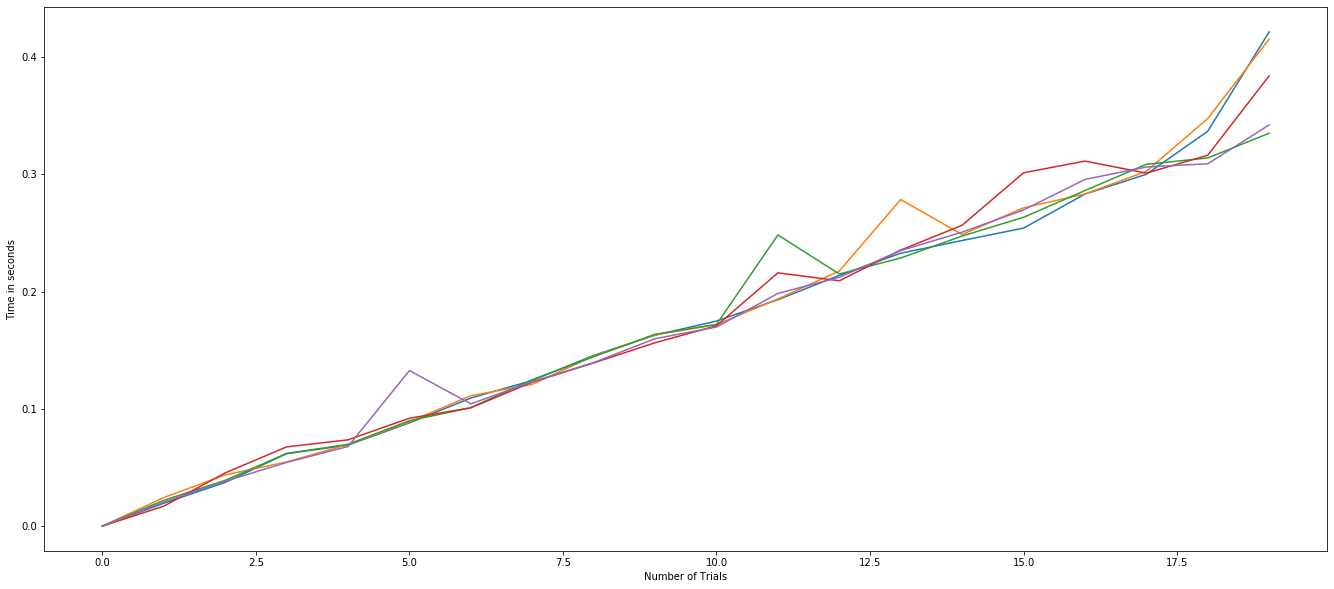

In [13]:
abg.get_duration_all_lines_plot(times=times)
plt.show()

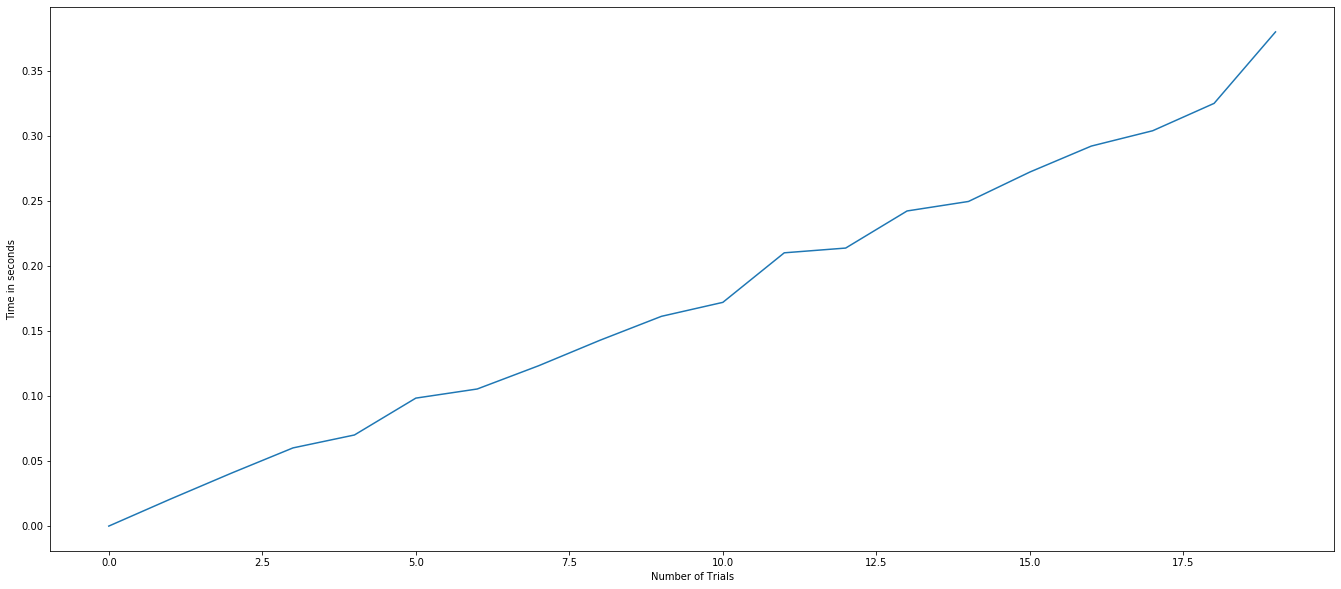

In [14]:
abg.get_duration_mean_plot(times=times)
plt.show()

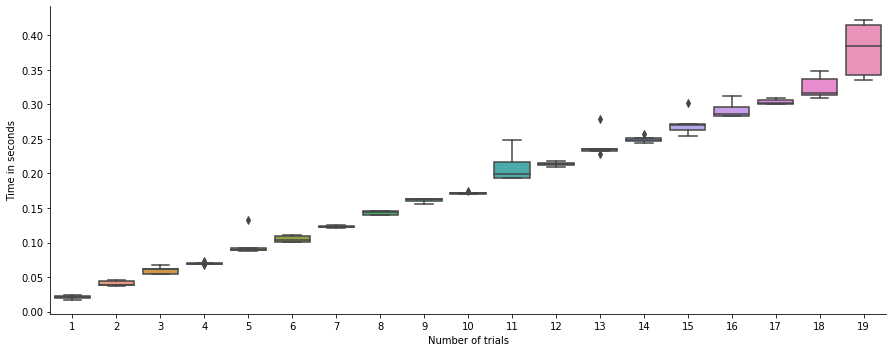

In [15]:
abg.get_duration_distribution_plot(times=times, kind="box")
plt.show()

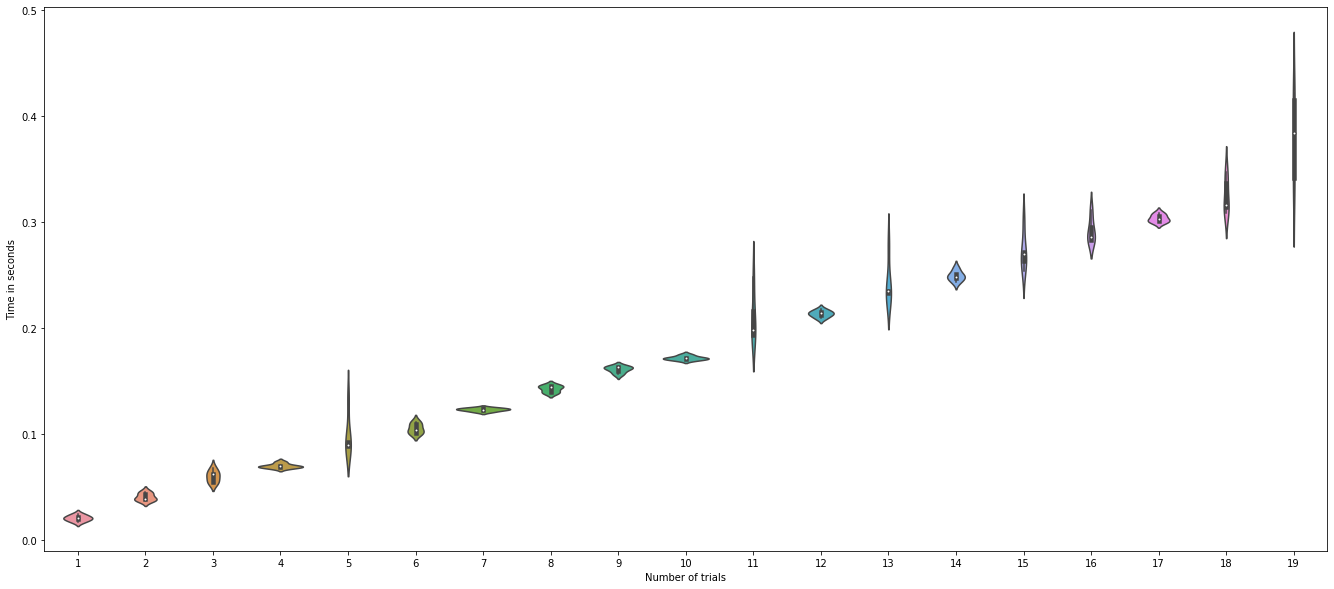

In [16]:
abg.get_duration_distribution_plot(times=times, kind="violin")
plt.show()

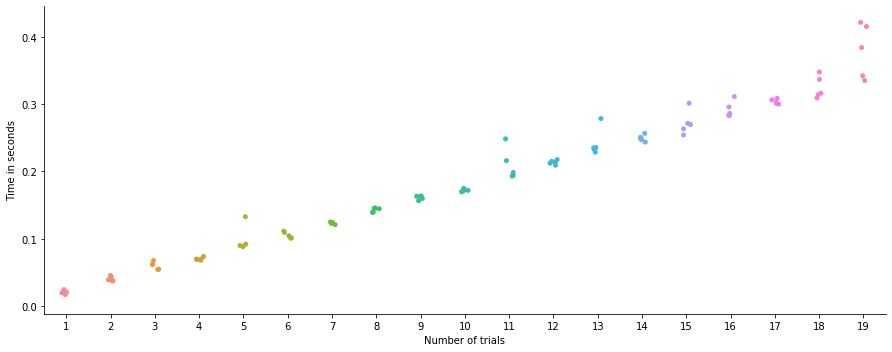

In [17]:
abg.get_duration_distribution_plot(times=times)
plt.show()

# Timing Experiment 2 - Investigate convergence of times

#### Hospital 1: lambda_a = 0.15, lambda_o = 0.2, mu = 0.05, num_of_servers = 8, threshold = 5
#### Hospital 2: lambda_a = 0.15, lambda_o = 0.1, mu = 0.04, num_of_servers = 7, threshold = 4
#### Hospital 3: lambda_a = 0.3, lambda_o = 0.3, mu = 0.05, num_of_servers= 12, threshold = 10
#### Hospital 4: lambda_a = 0.2, lambda_o = 0.3, mu = 0.05, num_of_servers= 13, threshold = 5

In [18]:
# par_1 = [0.09, 0.09, 0.013, 20, 16]
# par_2 = [0.07, 0.11, 0.01, 30, 25]
# par_3 = [0.11, 0.07, 0.013, 20, 19]
# par_4 = [0.13, 0.06, 0.03, 20, 8]

par_1 = [0.15, 0.2, 0.05, 8, 5]
par_2 = [0.15, 0.1, 0.04, 7, 4]
par_3 = [0.3, 0.3, 0.05, 12, 10]
par_4 = [0.2, 0.3, 0.05, 13, 5]

In [19]:
# Queueing Parameters
lambda_a = 0.15      # Ambulance: 9 arrivals per hour
lambda_o = 0.2       # Others: 12 arrivals per hour
mu = 0.05            # Service time: 3 services per hour
num_of_servers = 8   # Number of servers: 8 servers
threshold = 5        # Threshold of accepting ambulance patients
seed_num = None
warm_up_time = 100
output_type = "list"

# Timing Parameters
num_of_trials = 50

In [20]:
time_results = abg.simulation.get_multiple_runs_results(lambda_a=par_1[0], lambda_o=par_1[1], mu=par_1[2], num_of_servers=par_1[3], threshold=par_1[4], seed_num=seed_num, warm_up_time=warm_up_time, num_of_trials=num_of_trials, output_type=output_type)
time_results_2 = abg.simulation.get_multiple_runs_results(lambda_a=par_2[0], lambda_o=par_2[1], mu=par_2[2], num_of_servers=par_2[3], threshold=par_2[4], seed_num=seed_num, warm_up_time=warm_up_time, num_of_trials=num_of_trials, output_type=output_type)
time_results_3 = abg.simulation.get_multiple_runs_results(lambda_a=par_3[0], lambda_o=par_3[1], mu=par_3[2], num_of_servers=par_3[3], threshold=par_3[4], seed_num=seed_num, warm_up_time=warm_up_time, num_of_trials=num_of_trials, output_type=output_type)
time_results_4 = abg.simulation.get_multiple_runs_results(lambda_a=par_4[0], lambda_o=par_4[1], mu=par_4[2], num_of_servers=par_4[3], threshold=par_4[4], seed_num=seed_num, warm_up_time=warm_up_time, num_of_trials=num_of_trials, output_type=output_type)

###### Waiting Times

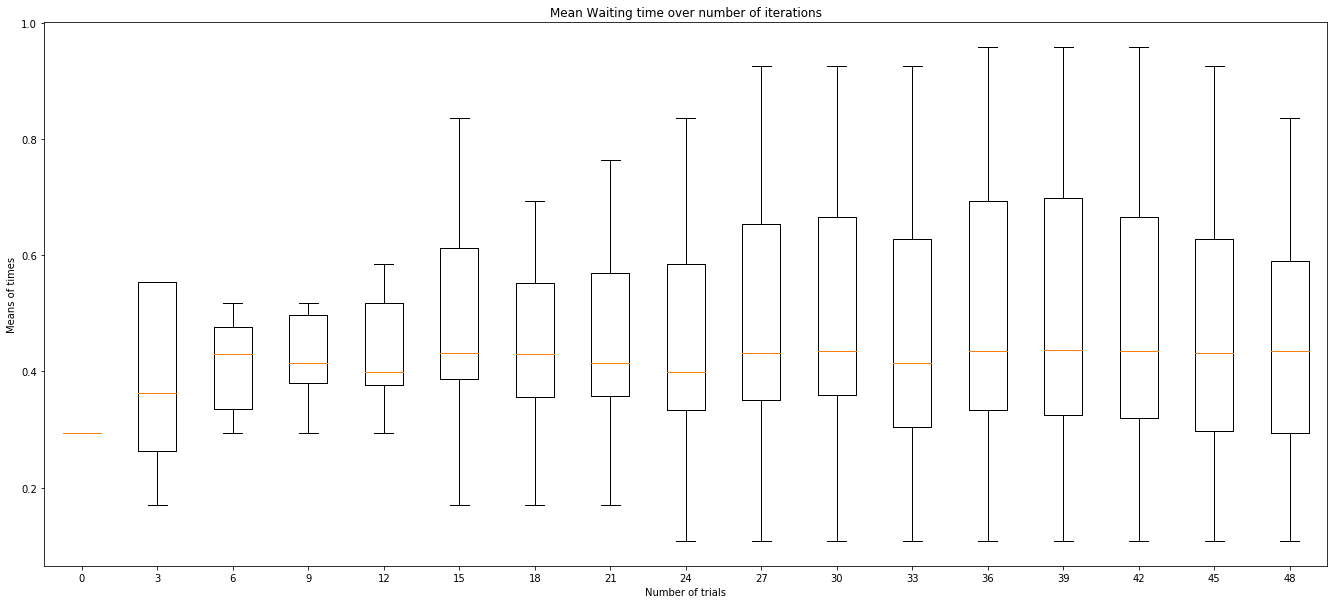

In [21]:
#1: lambda_a = 0.15, lambda_o = 0.2, mu = 0.05, num_of_servers = 8, threshold = 5
abg.make_plot_of_confidence_intervals_over_iterations(all_times=time_results, time_type="w")
plt.show()

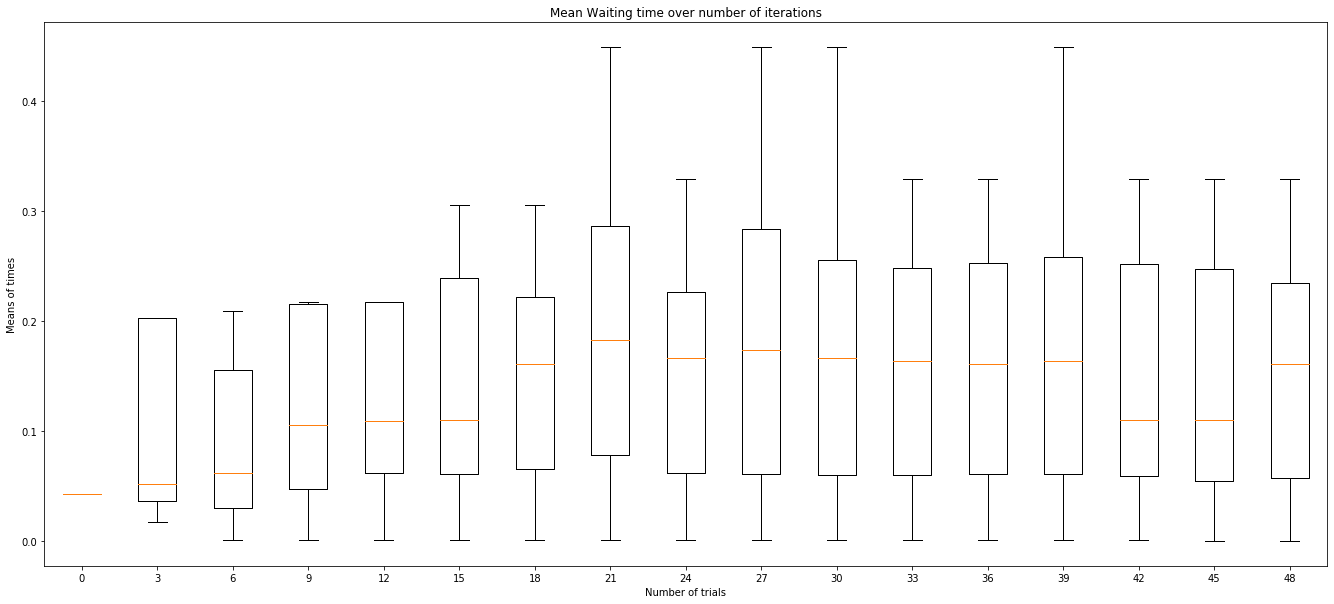

In [22]:
#2: lambda_a = 0.15, lambda_o = 0.1, mu = 0.04, num_of_servers = 7, threshold = 4
abg.make_plot_of_confidence_intervals_over_iterations(all_times=time_results_2, time_type="w")
plt.show()

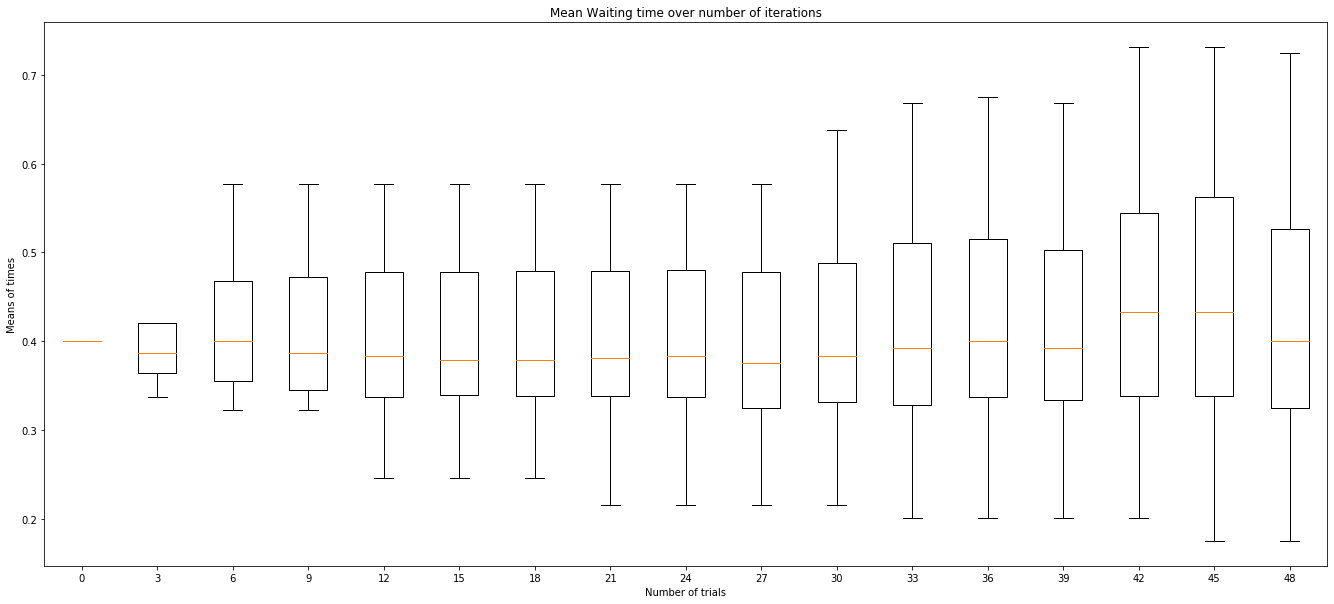

In [23]:
#3: lambda_a=0.3, lambda_o=0.3, mu=0.05, num_of_servers=12, threshold=10
abg.make_plot_of_confidence_intervals_over_iterations(all_times=time_results_3, time_type="w")
plt.show()

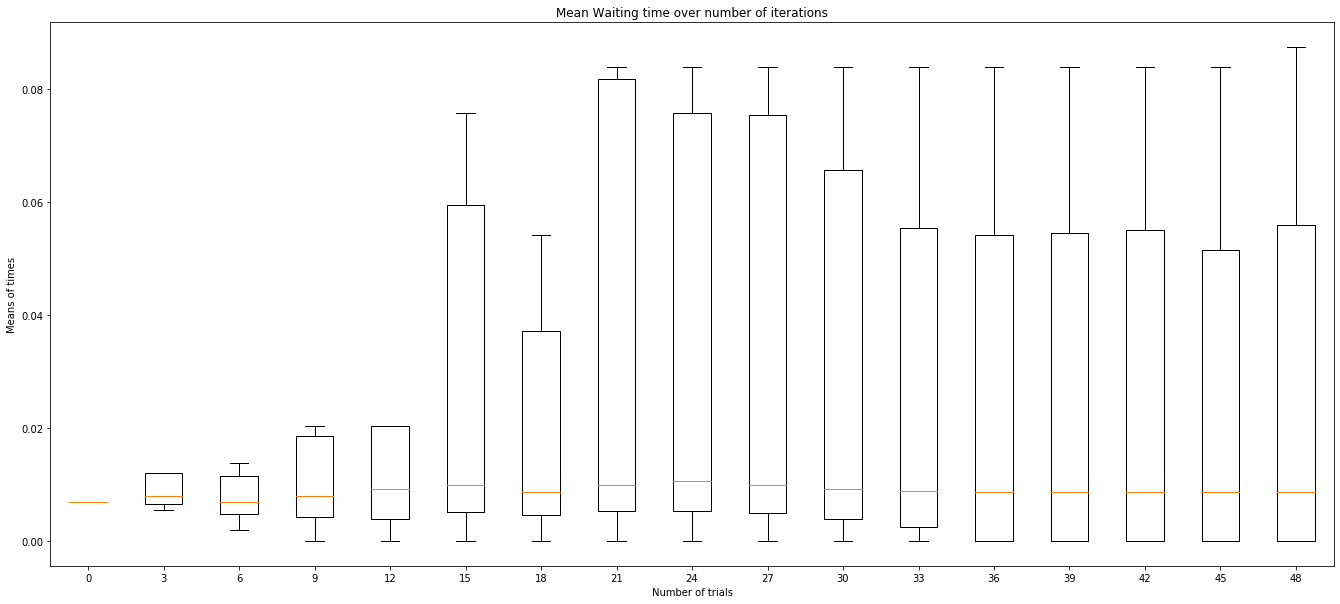

In [24]:
#4: lambda_a=0.2, lambda_o=0.3, mu=0.05, num_of_servers=13, threshold=5
abg.make_plot_of_confidence_intervals_over_iterations(all_times=time_results_4, time_type="w")
plt.show()

###### Blocking Times

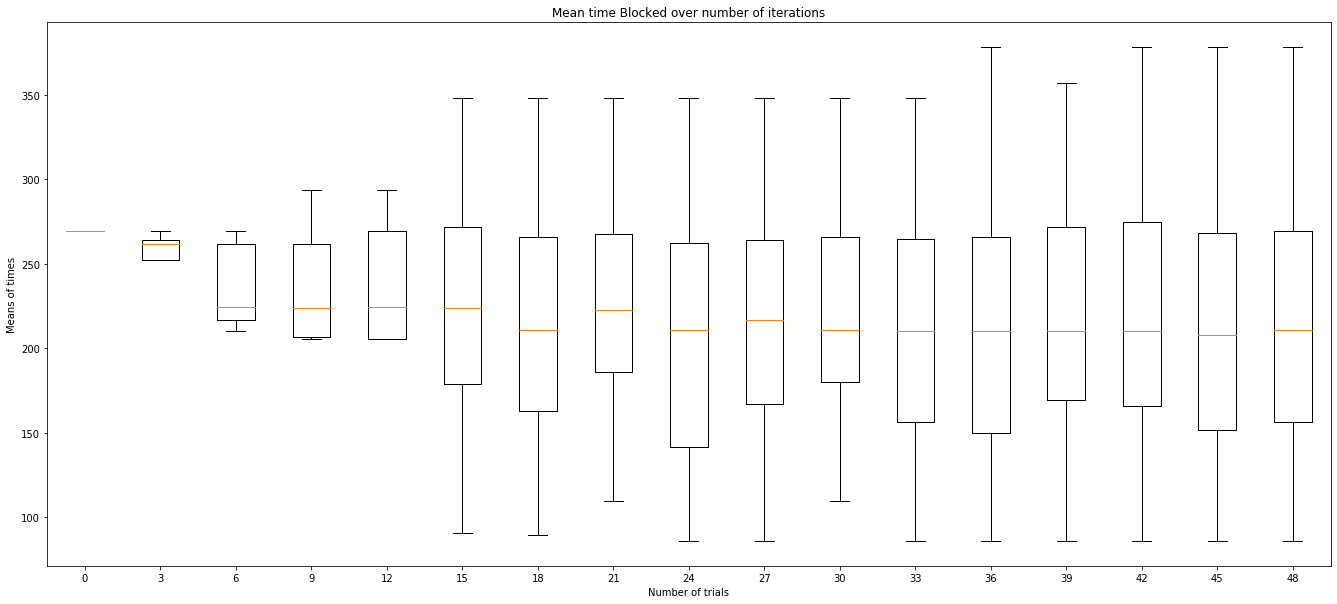

In [25]:
#1: lambda_a = 0.15, lambda_o = 0.2, mu = 0.05, num_of_servers = 8, threshold = 5
abg.make_plot_of_confidence_intervals_over_iterations(all_times=time_results, time_type="b")
plt.show()

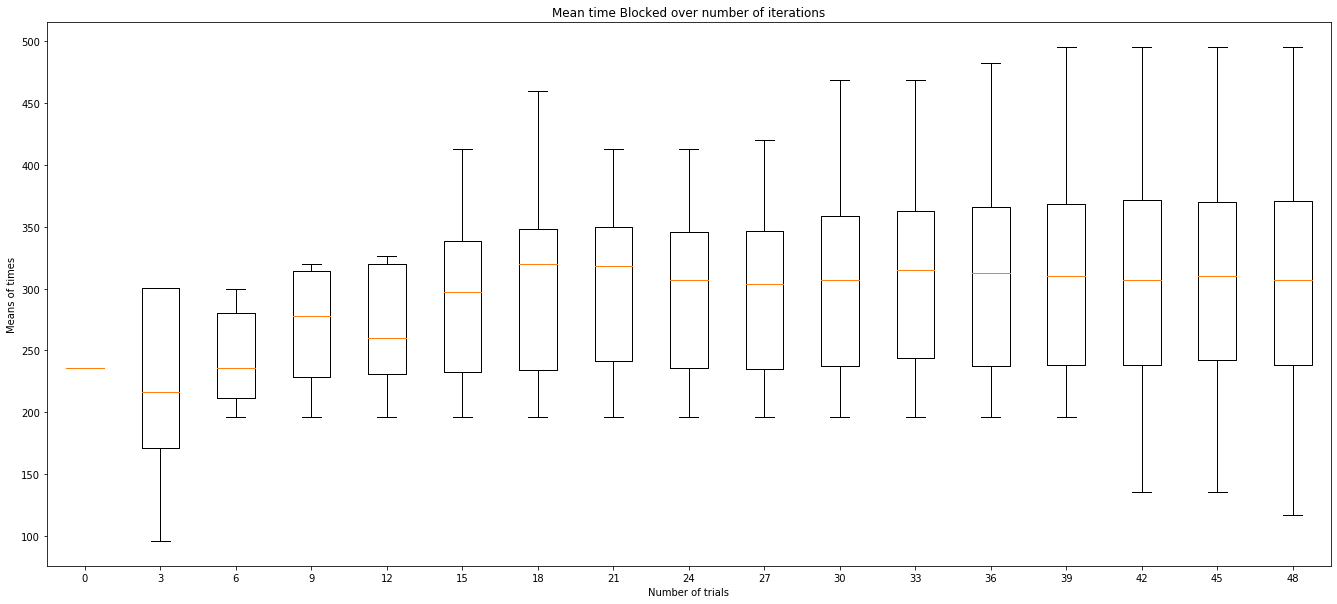

In [26]:
#2: lambda_a = 0.15, lambda_o = 0.1, mu = 0.04, num_of_servers = 7, threshold = 4
abg.make_plot_of_confidence_intervals_over_iterations(all_times=time_results_2, time_type="b")
plt.show()

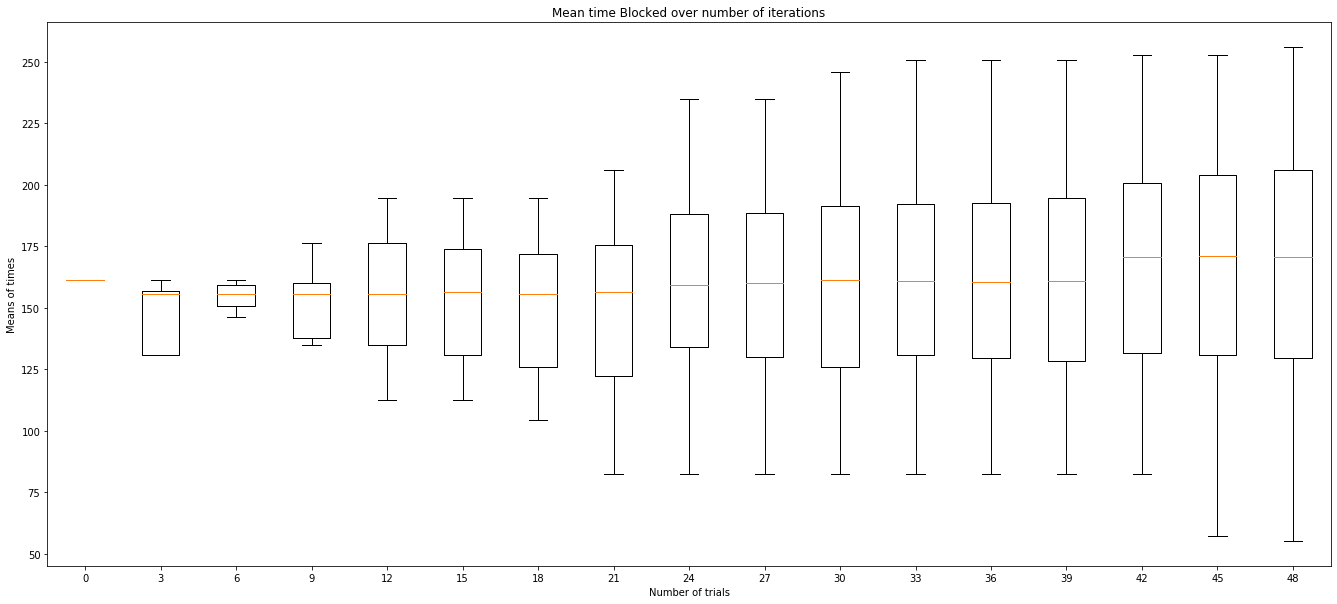

In [27]:
#3: lambda_a=0.3, lambda_o=0.3, mu=0.05, num_of_servers=12, threshold=10
abg.make_plot_of_confidence_intervals_over_iterations(all_times=time_results_3, time_type="b")
plt.show()

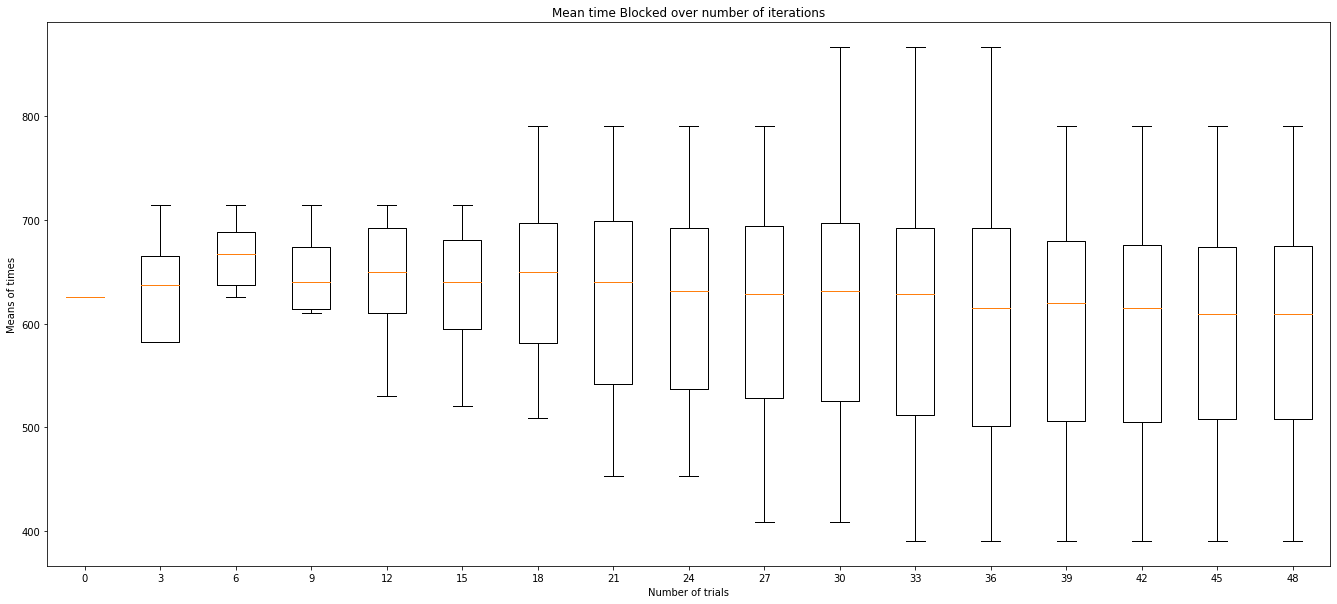

In [28]:
#4: lambda_a=0.2, lambda_o=0.3, mu=0.05, num_of_servers=13, threshold=5
abg.make_plot_of_confidence_intervals_over_iterations(all_times=time_results_4, time_type="b")
plt.show()

# Model plot 1 - Plots for different thresholds

In [29]:
# Queueing Parameters
lambda_a = 0.1       # Ambulance: 6 arrivals per hour
lambda_o = 0.05      # Others: 3 arrivals per hour
mu = 0.02            # Service time: 3 services per hour
num_of_servers = 8   # Number of servers: 8 servers
seed_num = None
runtime = 1440

# Plot Parameters
num_of_trials = 10
measurement_type = "both"      # The measurement to be plotted ["w":waiting times, "b":blocking times, otherwise: both]
max_threshold = 10

###### Waiting Times

c:\users\micha\desktop\phd\rsch\ambulancedecisiongame\src\ambulance_game\model_plots.py:218: RuntimeWarning: Mean of empty slice
  current_ambulance_patients_mean_times.append(np.nanmean(times[0]))


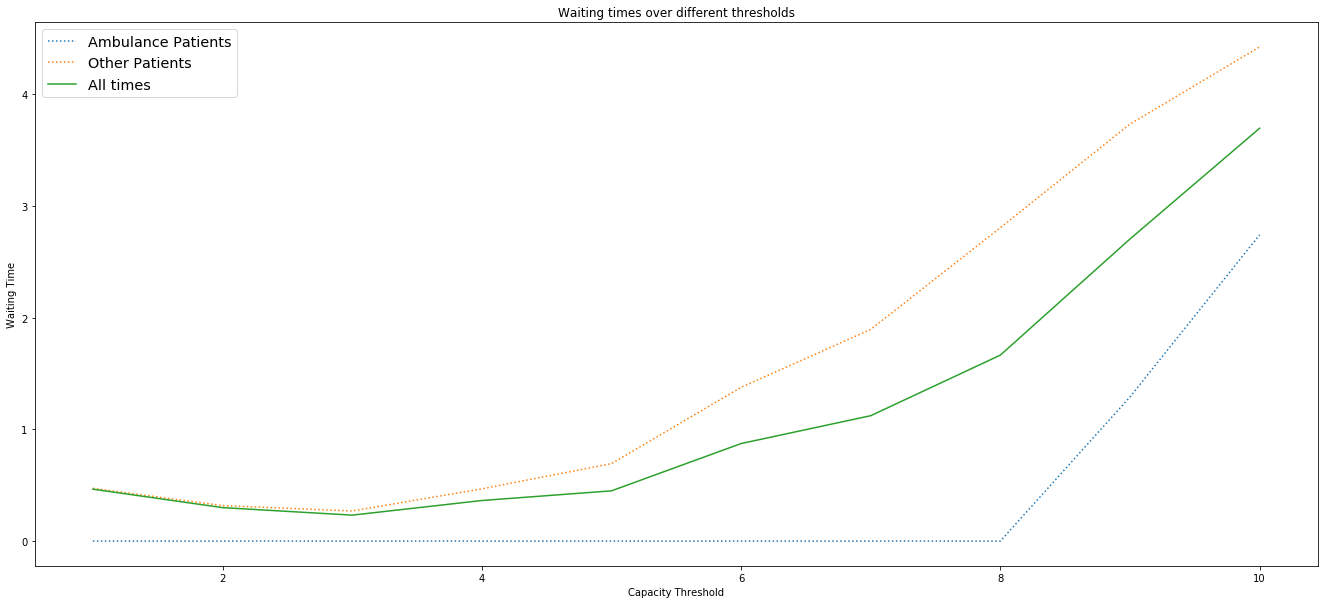

In [30]:
#1: lambda_a = 0.15, lambda_o = 0.2, mu = 0.05, num_of_servers = 8
abg.make_plot_for_different_thresholds(lambda_a=par_1[0], lambda_o=par_1[1], mu=par_1[2], num_of_servers=par_1[3], num_of_trials=num_of_trials, seed_num=seed_num, measurement_type="w", runtime=runtime, max_threshold=max_threshold)
plt.show()

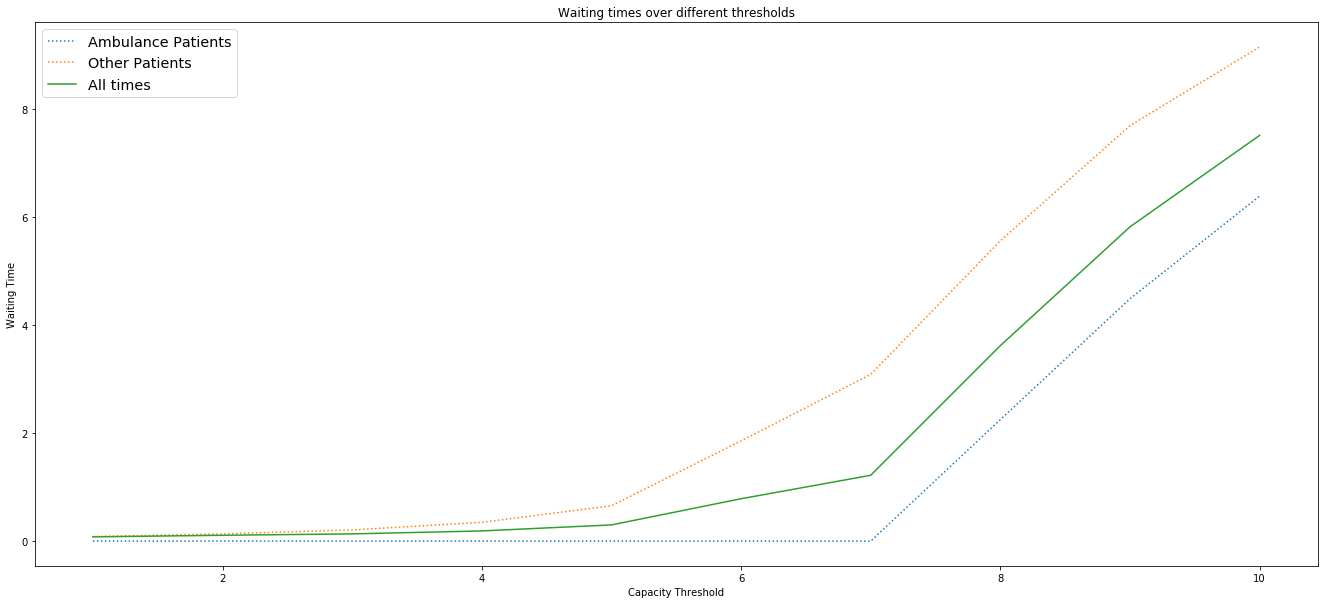

In [31]:
#2: lambda_a=0.15, lambda_o=0.1, mu=0.04, num_of_servers=7
abg.make_plot_for_different_thresholds(lambda_a=par_2[0], lambda_o=par_2[1], mu=par_2[2], num_of_servers=par_2[3], num_of_trials=num_of_trials, seed_num=seed_num, measurement_type="w", runtime=runtime, max_threshold=max_threshold)
plt.show()

c:\users\micha\desktop\phd\rsch\ambulancedecisiongame\src\ambulance_game\model_plots.py:218: RuntimeWarning: Mean of empty slice
  current_ambulance_patients_mean_times.append(np.nanmean(times[0]))


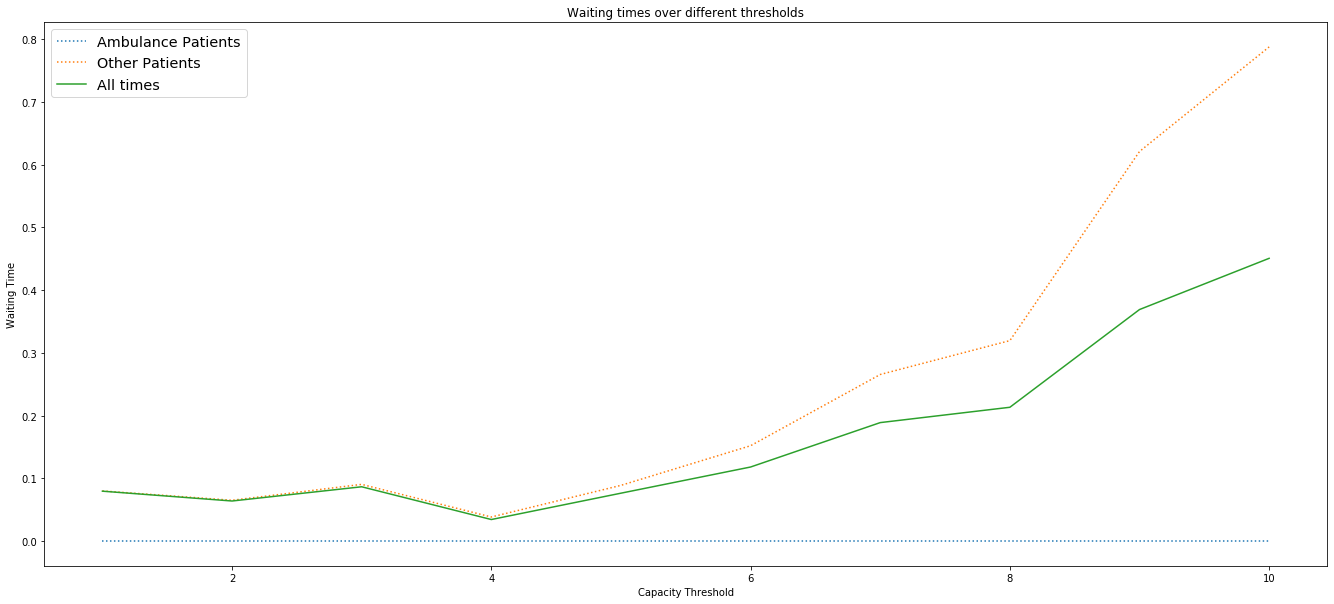

In [32]:
#3: lambda_a=0.3, lambda_o=0.3, mu=0.05, num_of_servers=12
abg.make_plot_for_different_thresholds(lambda_a=par_3[0], lambda_o=par_3[1], mu=par_3[2], num_of_servers=par_3[3], num_of_trials=num_of_trials, seed_num=seed_num, measurement_type="w", runtime=runtime, max_threshold=max_threshold)
plt.show()

c:\users\micha\desktop\phd\rsch\ambulancedecisiongame\src\ambulance_game\model_plots.py:218: RuntimeWarning: Mean of empty slice
  current_ambulance_patients_mean_times.append(np.nanmean(times[0]))


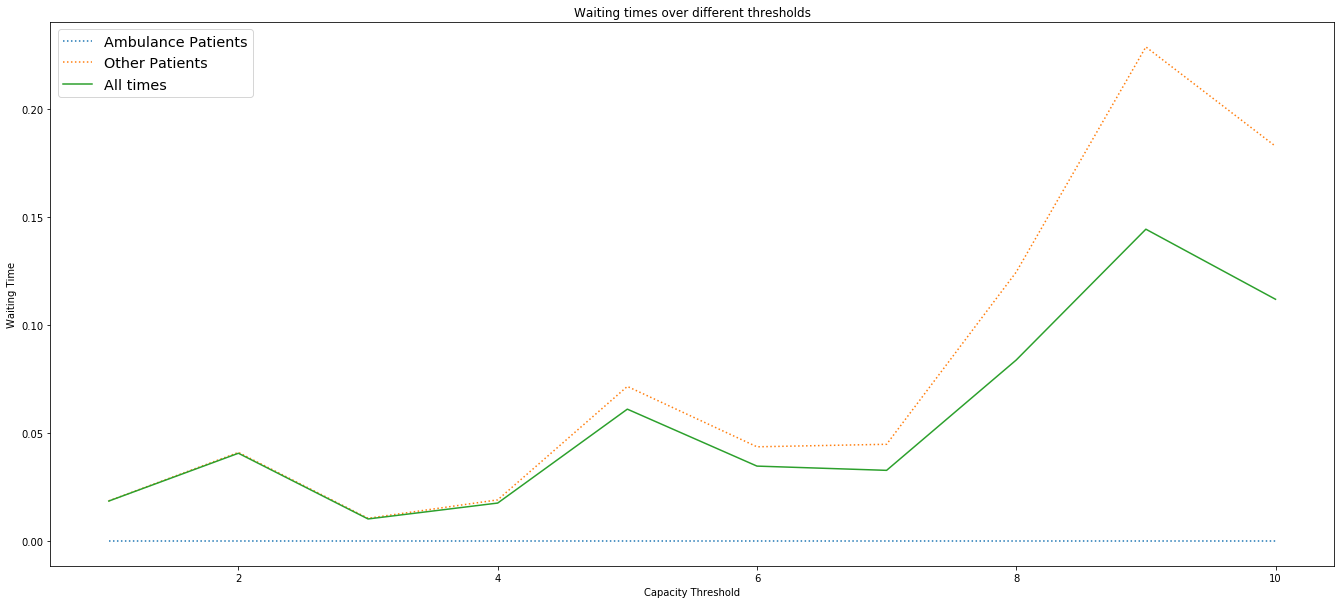

In [33]:
#4: lambda_a=0.2, lambda_o=0.3, mu=0.05, num_of_servers=13
abg.make_plot_for_different_thresholds(lambda_a=par_4[0], lambda_o=par_4[1], mu=par_4[2], num_of_servers=par_4[3], num_of_trials=num_of_trials, seed_num=seed_num, measurement_type="w", runtime=runtime, max_threshold=max_threshold)
plt.show()

###### Blocking Times

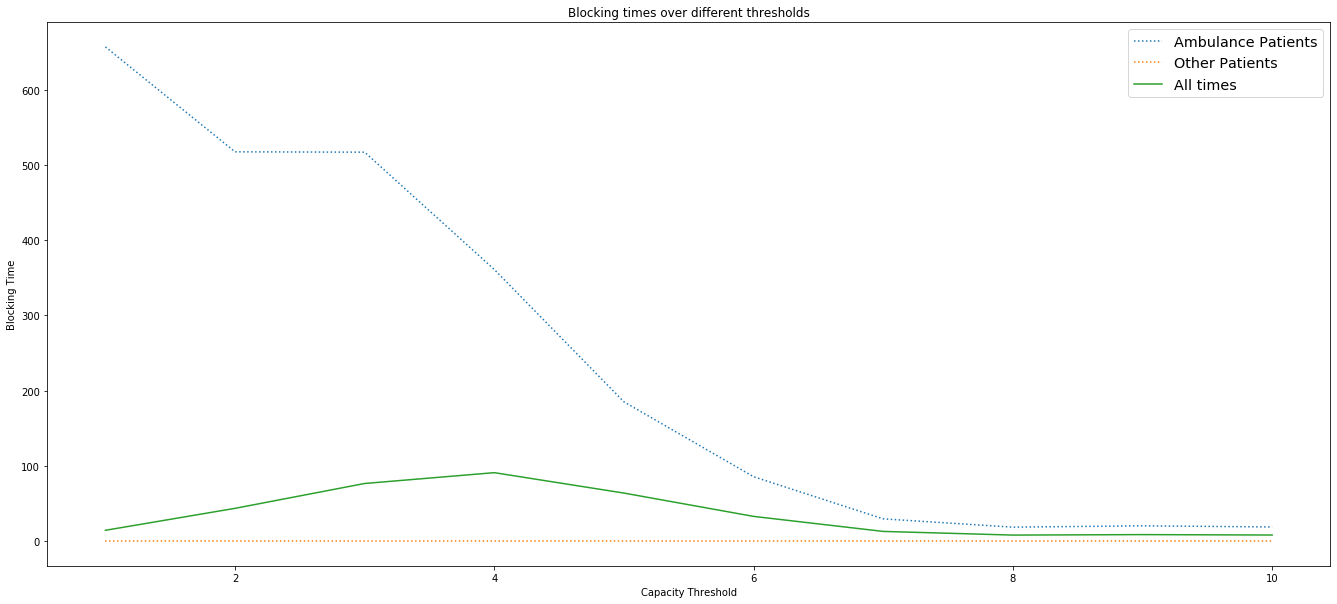

In [34]:
#1: lambda_a = 0.15, lambda_o = 0.2, mu = 0.05, num_of_servers = 8
abg.make_plot_for_different_thresholds(lambda_a=par_1[0], lambda_o=par_1[1], mu=par_1[2], num_of_servers=par_1[3], num_of_trials=num_of_trials, seed_num=seed_num, measurement_type="b", runtime=runtime, max_threshold=max_threshold)
plt.show()

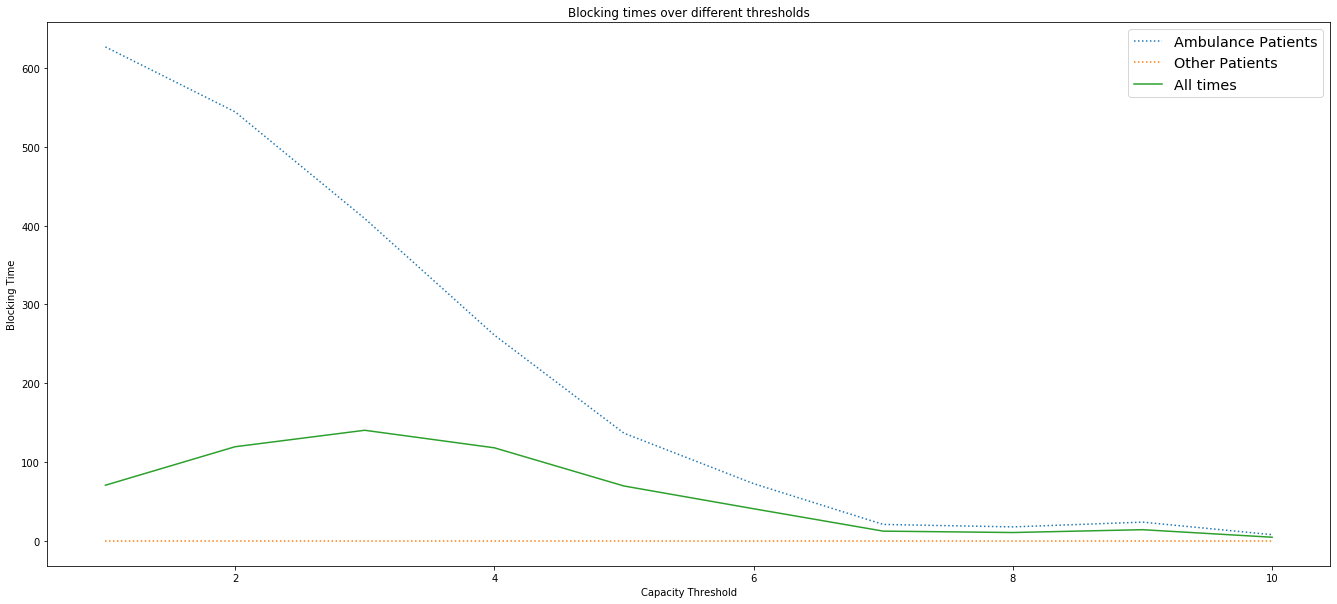

In [35]:
#2: lambda_a=0.15, lambda_o=0.1, mu=0.04, num_of_servers=7
abg.make_plot_for_different_thresholds(lambda_a=par_2[0], lambda_o=par_2[1], mu=par_2[2], num_of_servers=par_2[3], num_of_trials=num_of_trials, seed_num=seed_num, measurement_type="b", runtime=runtime, max_threshold=max_threshold)
plt.show()

c:\users\micha\desktop\phd\rsch\ambulancedecisiongame\src\ambulance_game\model_plots.py:218: RuntimeWarning: Mean of empty slice
  current_ambulance_patients_mean_times.append(np.nanmean(times[0]))


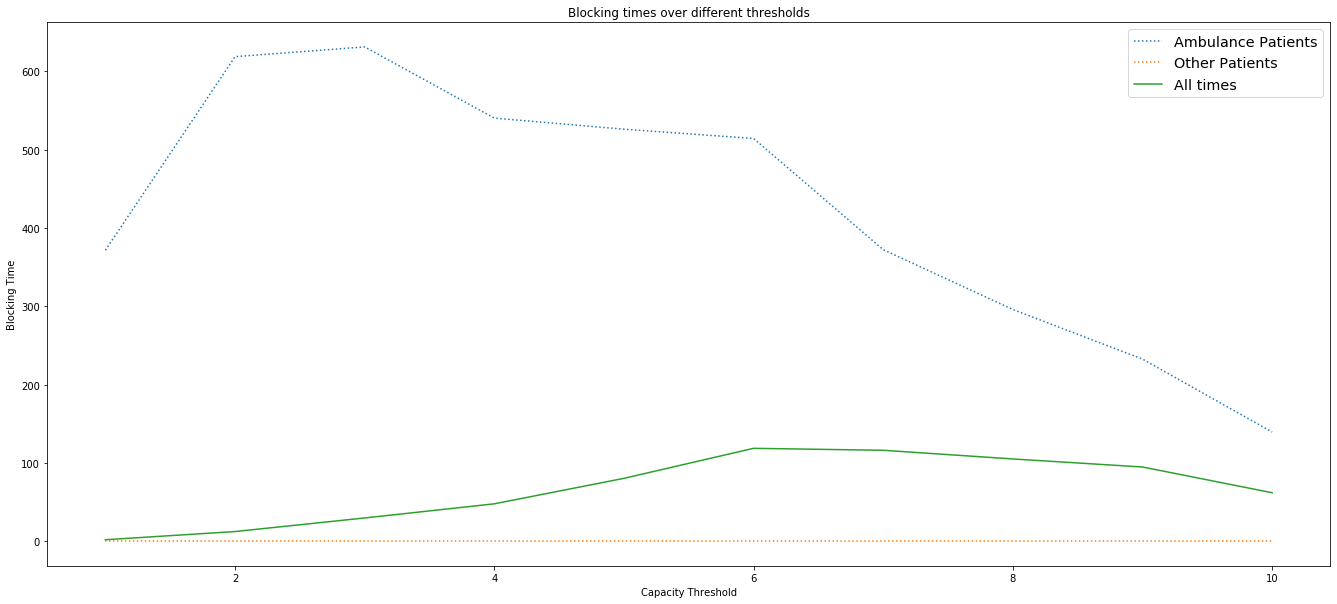

In [36]:
#3: lambda_a=0.3, lambda_o=0.3, mu=0.05, num_of_servers=12
abg.make_plot_for_different_thresholds(lambda_a=par_3[0], lambda_o=par_3[1], mu=par_3[2], num_of_servers=par_3[3], num_of_trials=num_of_trials, seed_num=seed_num, measurement_type="b", runtime=runtime, max_threshold=max_threshold)
plt.show()

c:\users\micha\desktop\phd\rsch\ambulancedecisiongame\src\ambulance_game\model_plots.py:218: RuntimeWarning: Mean of empty slice
  current_ambulance_patients_mean_times.append(np.nanmean(times[0]))


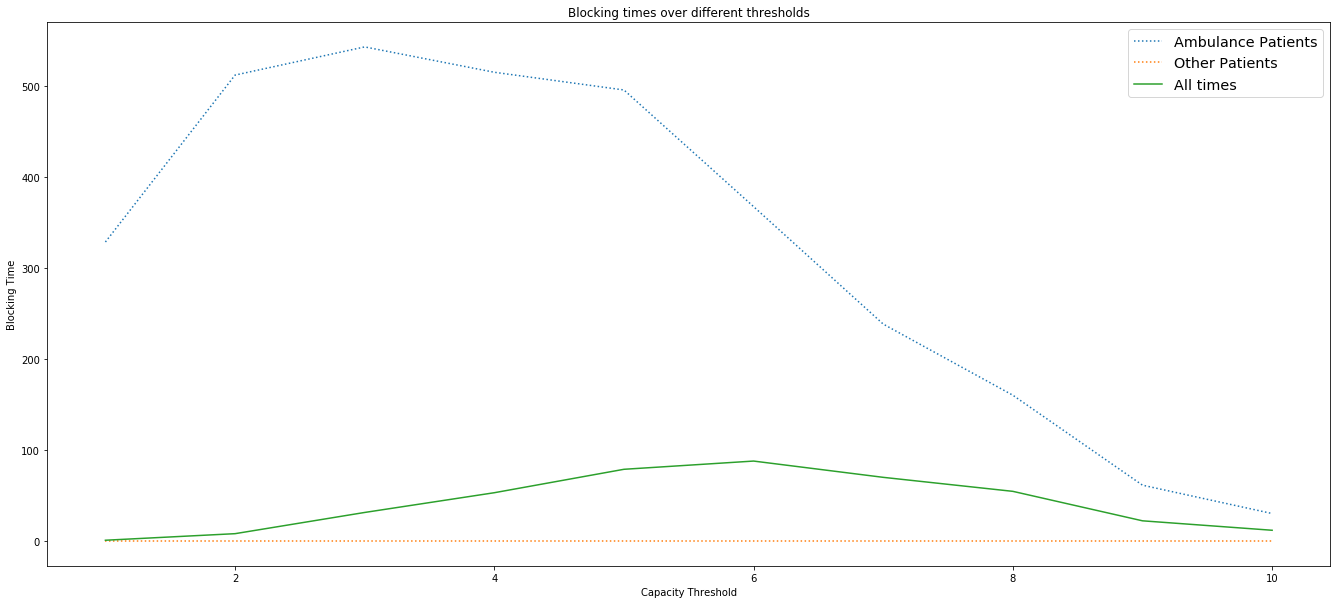

In [37]:
#4: lambda_a=0.2, lambda_o=0.3, mu=0.05, num_of_servers=13
abg.make_plot_for_different_thresholds(lambda_a=par_4[0], lambda_o=par_4[1], mu=par_4[2], num_of_servers=par_4[3], num_of_trials=num_of_trials, seed_num=seed_num, measurement_type="b", runtime=runtime, max_threshold=max_threshold)
plt.show()

# Model plot 2 - Plots of proportion within time limit

In [40]:
# Queueing Parameters
lambda_a = 0.1       # Ambulance: 6 arrivals per hour
lambda_o = 0.08      # Others: 4.8 arrivals per hour
mu = 0.03            # Service time: 1.8 services per hour
num_of_servers = 6   # Number of servers: 6 servers
seed_num = 10
runtime = 1440

# Plot Parameters
num_of_trials = 10
target = 4
max_threshold = 10

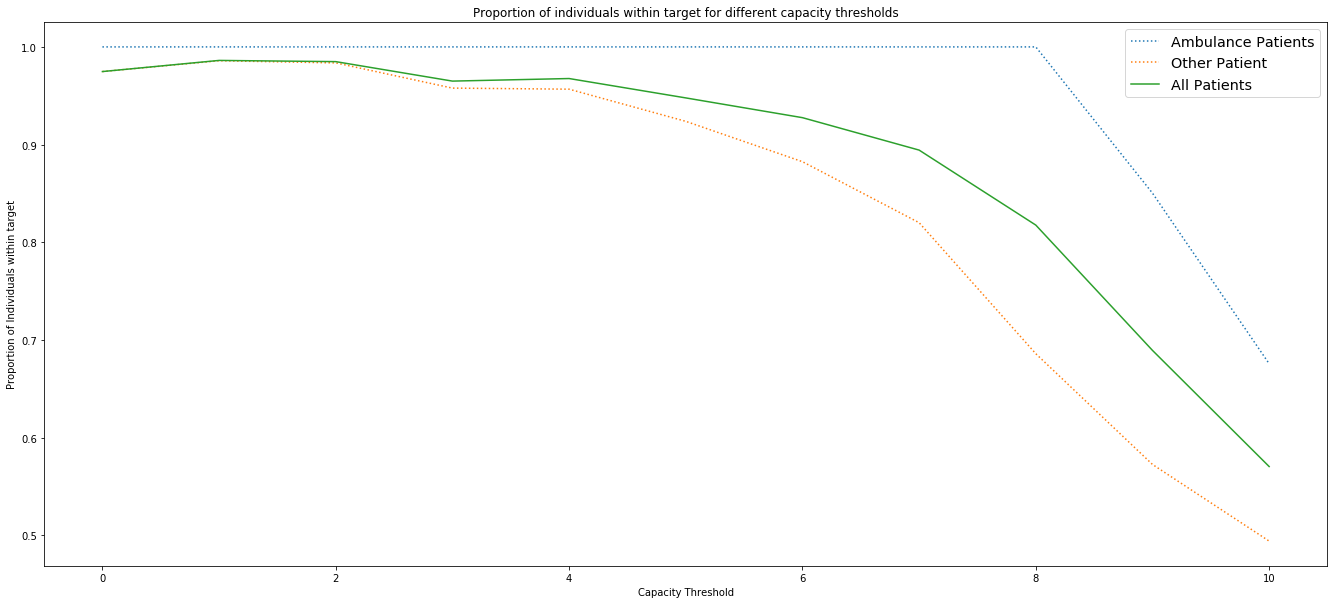

In [39]:
#1: lambda_a=0.15, lambda_o=0.2, mu=0.05, num_of_servers=8
abg.make_plot_for_proportion_within_target(lambda_a=par_1[0], lambda_o=par_1[1], mu=par_1[2], num_of_servers=par_1[3], num_of_trials=num_of_trials, seed_num=seed_num, target=target, runtime=runtime, max_threshold=max_threshold)
plt.show()

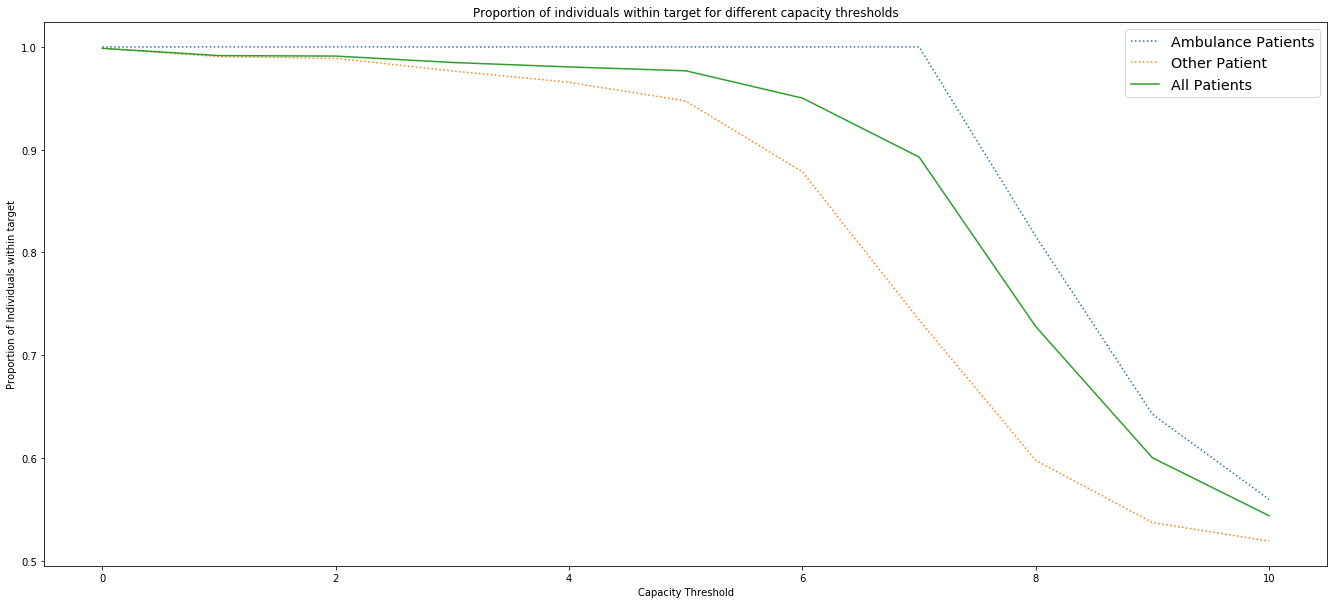

In [41]:
#2: lambda_a=0.15, lambda_o=0.1, mu=0.04, num_of_servers=7
abg.make_plot_for_proportion_within_target(lambda_a=par_2[0], lambda_o=par_2[1], mu=par_2[2], num_of_servers=par_2[3], num_of_trials=num_of_trials, seed_num=seed_num, target=target, runtime=runtime, max_threshold=max_threshold)
plt.show()

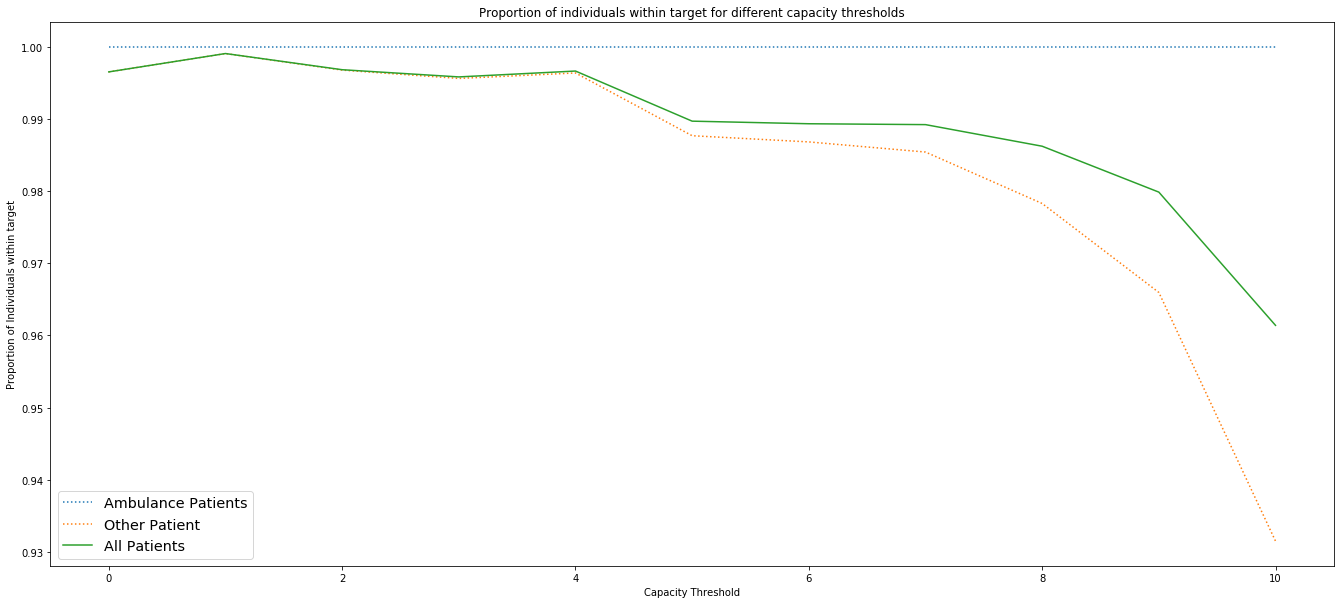

In [42]:
#3: lambda_a=0.3, lambda_o=0.3, mu=0.05, num_of_servers=12
abg.make_plot_for_proportion_within_target(lambda_a=par_3[0], lambda_o=par_3[1], mu=par_3[2], num_of_servers=par_3[3], num_of_trials=num_of_trials, seed_num=seed_num, target=target, runtime=runtime, max_threshold=max_threshold)
plt.show()

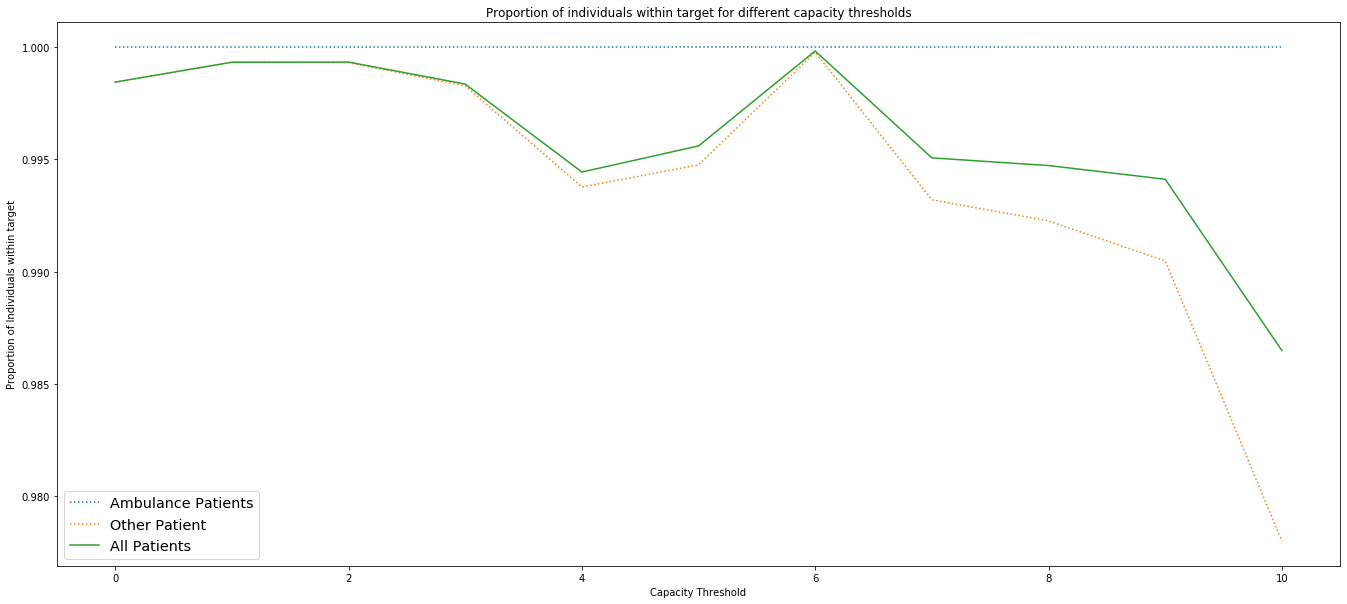

In [43]:
#4: lambda_a=0.2, lambda_o=0.3, mu=0.05, num_of_servers=13
abg.make_plot_for_proportion_within_target(lambda_a=par_4[0], lambda_o=par_4[1], mu=par_4[2], num_of_servers=par_4[3], num_of_trials=num_of_trials, seed_num=seed_num, target=target, runtime=runtime, max_threshold=max_threshold)
plt.show()

# Model plot 3 - Plot of waiting/blocking times VS arrivals for 2 hospitals

In [44]:
# System Parameters
lambda_a = 0.15
runtime = 1440

# Hospital 1 Parameters
lambda_o_1 = 0.08      # Others: 4.8 arrivals per hour
mu_1 = 0.03            # Service time: 1.8 services per hour
num_of_servers_1 = 6   # Number of servers: 6 servers
threshold_1 = 3

# Hospital 2 Parameters
lambda_o_2 = 0.08
mu_2 = 0.03
num_of_servers_2 = 6
threshold_2 = 3

# Plot Parameters
seed_num_1 = None
seed_num_2 = None
warm_up_time = 100
num_of_trials = 100
accuracy = 10

###### Waiting Times

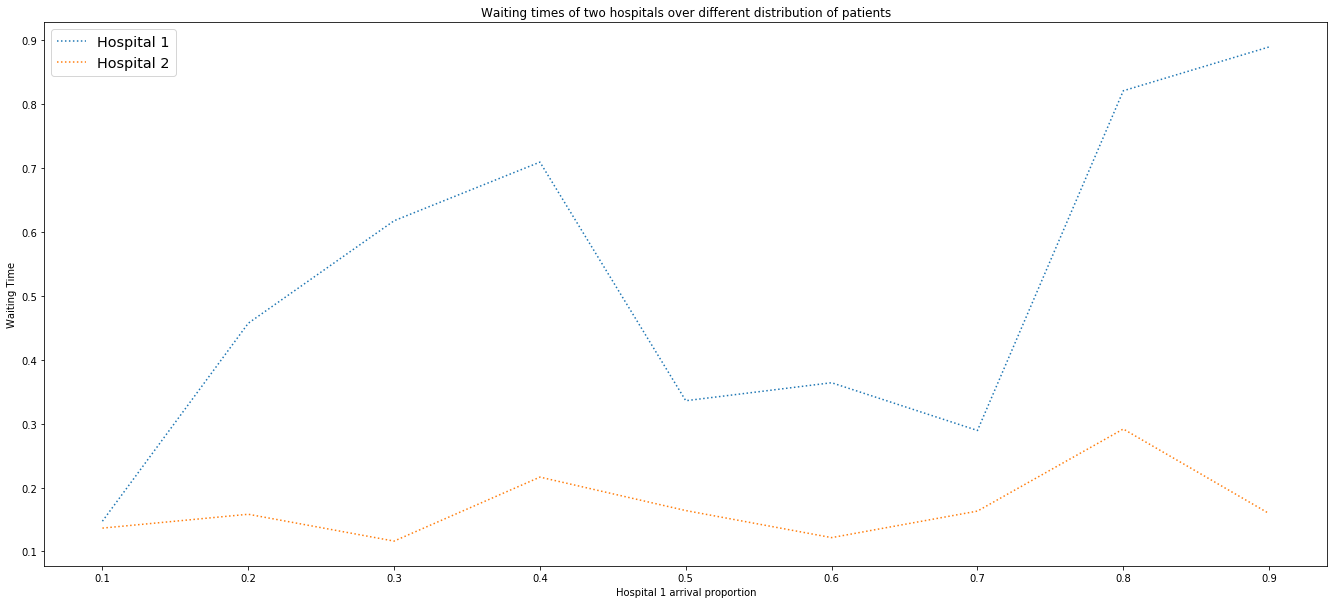

In [45]:
# 1 + 2
abg.make_plot_two_hospitals_arrival_split(lambda_a=par_1[0]+par_2[0], lambda_o_1=par_1[1], lambda_o_2=par_2[1], mu_1=par_1[2], mu_2=par_2[2], num_of_servers_1=par_1[3], num_of_servers_2=par_2[3], threshold_1=par_1[4], threshold_2=par_2[4], measurement_type="w", seed_num_1=seed_num_1, seed_num_2=seed_num_2, warm_up_time=warm_up_time, trials=num_of_trials, accuracy=accuracy, runtime=runtime)
plt.show()

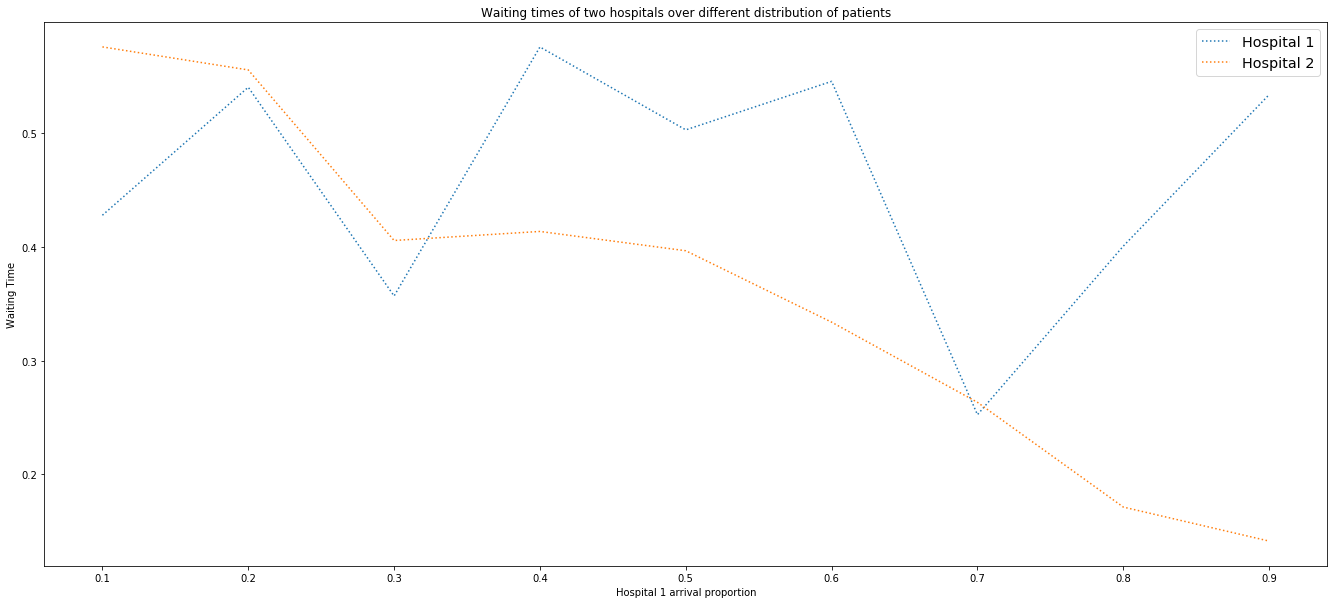

In [46]:
# 1 + 3
abg.make_plot_two_hospitals_arrival_split(lambda_a=par_1[0]+par_3[0], lambda_o_1=par_1[1], lambda_o_2=par_3[1], mu_1=par_1[2], mu_2=par_3[2], num_of_servers_1=par_1[3], num_of_servers_2=par_3[3], threshold_1=par_1[4], threshold_2=par_3[4], measurement_type="w", seed_num_1=seed_num_1, seed_num_2=seed_num_2, warm_up_time=warm_up_time, trials=num_of_trials, accuracy=accuracy, runtime=runtime)
plt.show()

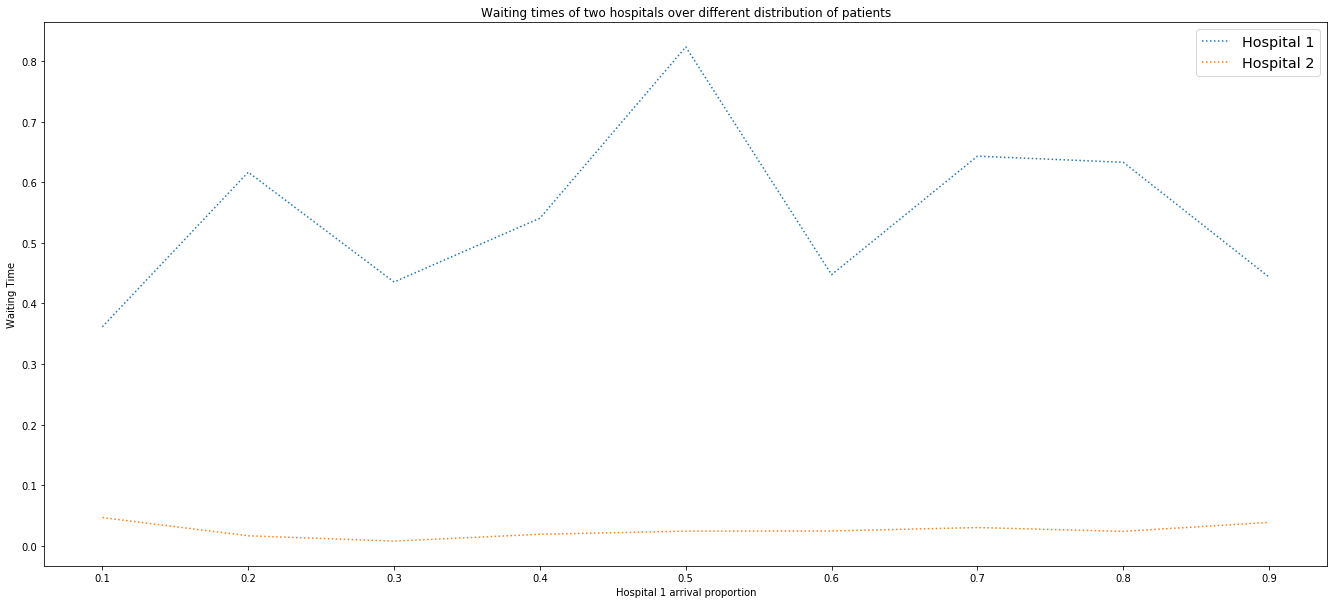

In [47]:
# 1 + 4
abg.make_plot_two_hospitals_arrival_split(lambda_a=par_1[0]+par_4[0], lambda_o_1=par_1[1], lambda_o_2=par_4[1], mu_1=par_1[2], mu_2=par_4[2], num_of_servers_1=par_1[3], num_of_servers_2=par_4[3], threshold_1=par_1[4], threshold_2=par_4[4], measurement_type="w", seed_num_1=seed_num_1, seed_num_2=seed_num_2, warm_up_time=warm_up_time, trials=num_of_trials, accuracy=accuracy, runtime=runtime)
plt.show()

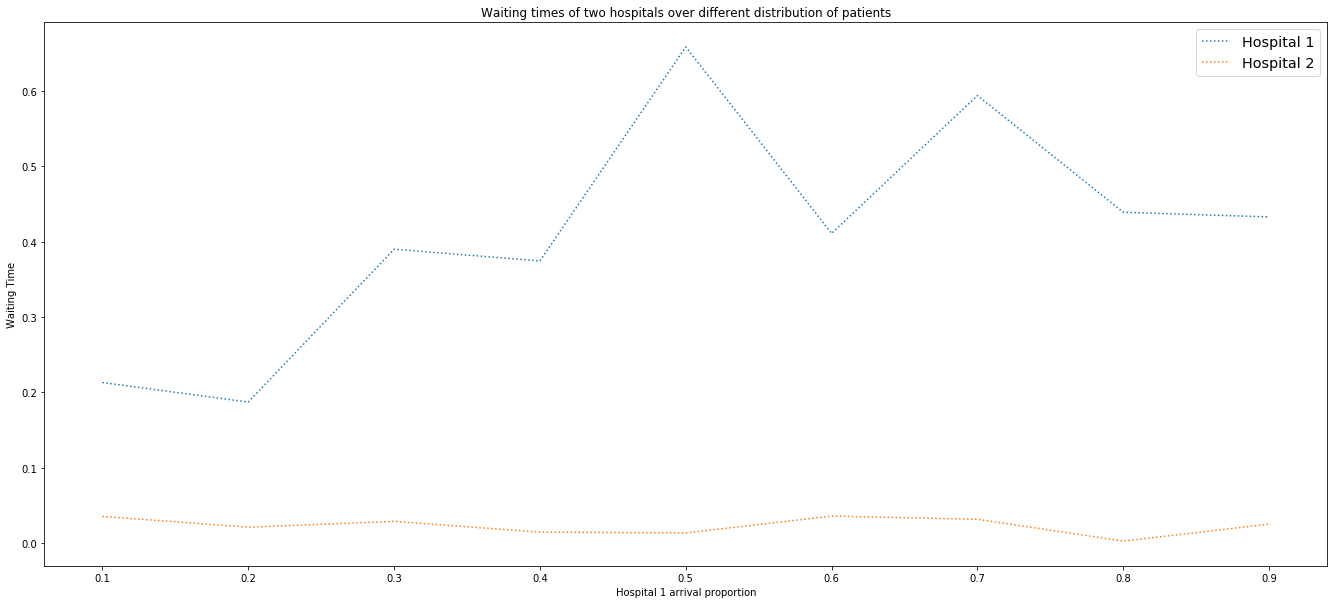

In [48]:
# 3 + 4
abg.make_plot_two_hospitals_arrival_split(lambda_a=par_3[0]+par_4[0], lambda_o_1=par_3[1], lambda_o_2=par_4[1], mu_1=par_3[2], mu_2=par_4[2], num_of_servers_1=par_3[3], num_of_servers_2=par_4[3], threshold_1=par_3[4], threshold_2=par_4[4], measurement_type="w", seed_num_1=seed_num_1, seed_num_2=seed_num_2, warm_up_time=warm_up_time, trials=num_of_trials, accuracy=accuracy, runtime=runtime)
plt.show()

###### Blocking Times

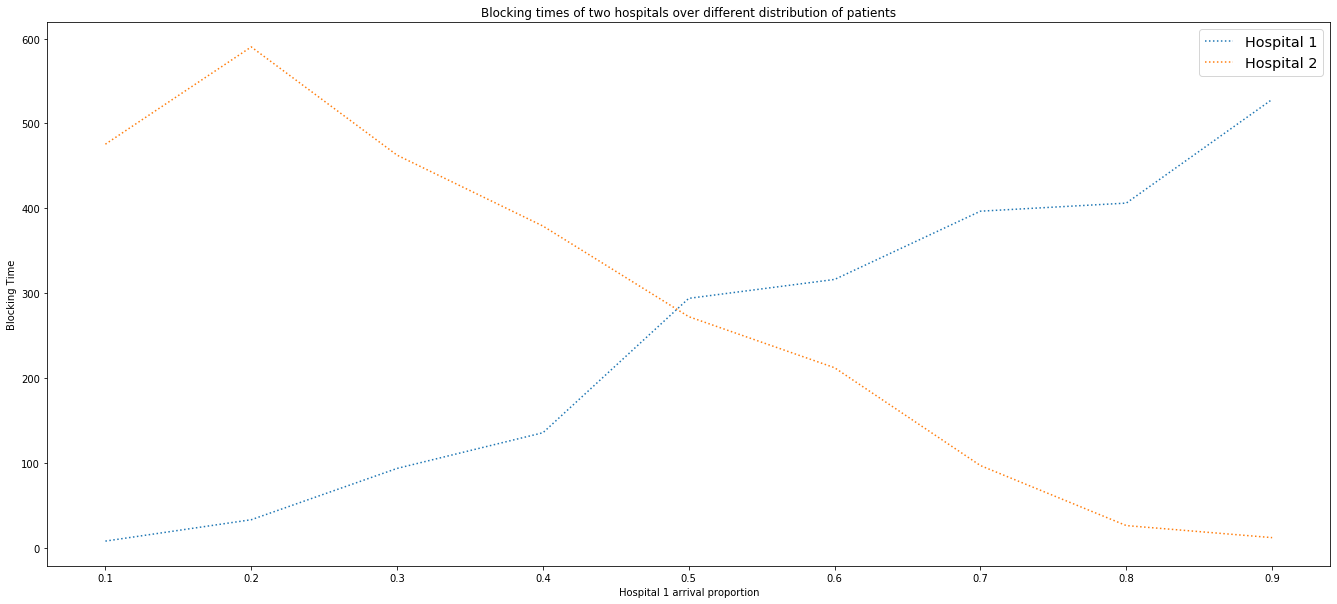

In [49]:
# 1 + 2
abg.make_plot_two_hospitals_arrival_split(lambda_a=par_1[0]+par_2[0], lambda_o_1=par_1[1], lambda_o_2=par_2[1], mu_1=par_1[2], mu_2=par_2[2], num_of_servers_1=par_1[3], num_of_servers_2=par_2[3], threshold_1=par_1[4], threshold_2=par_2[4], measurement_type="b", seed_num_1=seed_num_1, seed_num_2=seed_num_2, warm_up_time=warm_up_time, trials=num_of_trials, accuracy=accuracy, runtime=runtime)
plt.show()

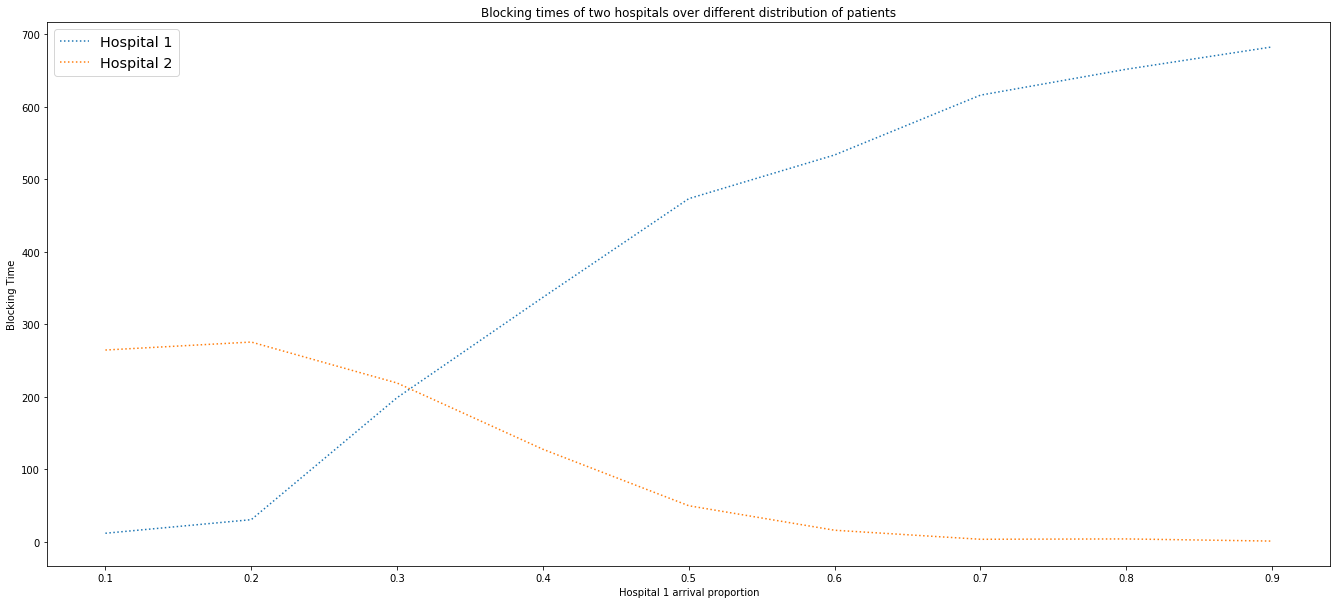

In [50]:
# 1 + 3
abg.make_plot_two_hospitals_arrival_split(lambda_a=par_1[0]+par_3[0], lambda_o_1=par_1[1], lambda_o_2=par_3[1], mu_1=par_1[2], mu_2=par_3[2], num_of_servers_1=par_1[3], num_of_servers_2=par_3[3], threshold_1=par_1[4], threshold_2=par_3[4], measurement_type="b", seed_num_1=seed_num_1, seed_num_2=seed_num_2, warm_up_time=warm_up_time, trials=num_of_trials, accuracy=accuracy, runtime=runtime)
plt.show()

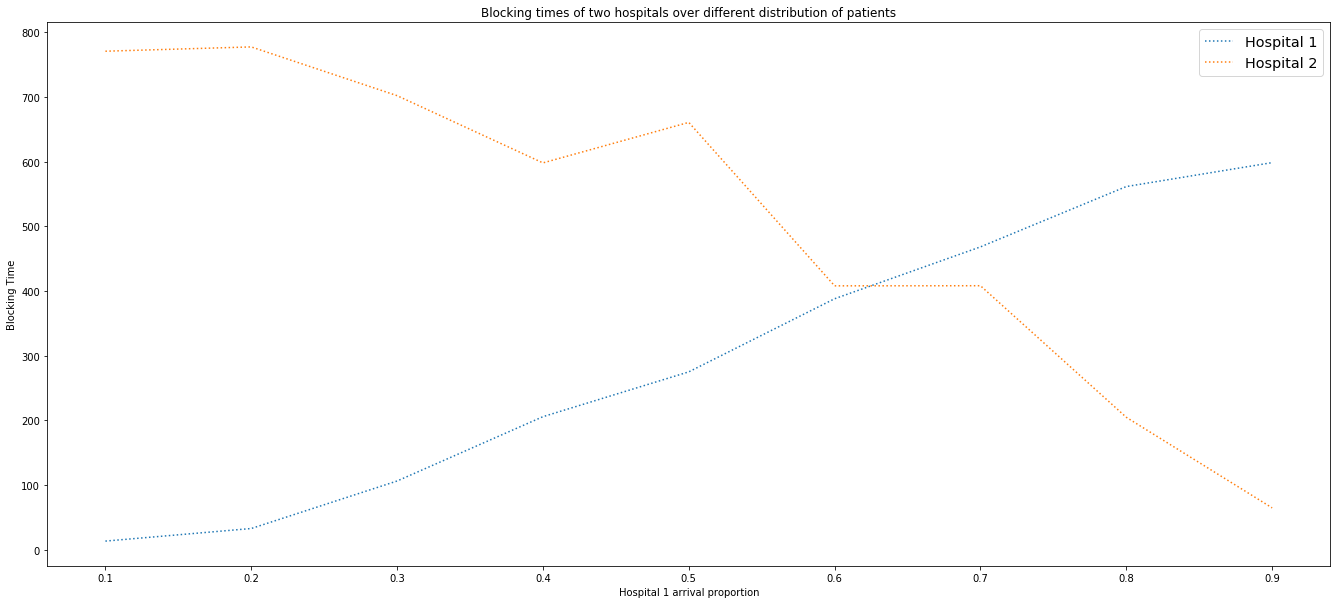

In [51]:
# 1 + 4
abg.make_plot_two_hospitals_arrival_split(lambda_a=par_1[0]+par_4[0], lambda_o_1=par_1[1], lambda_o_2=par_4[1], mu_1=par_1[2], mu_2=par_4[2], num_of_servers_1=par_1[3], num_of_servers_2=par_4[3], threshold_1=par_1[4], threshold_2=par_4[4], measurement_type="b", seed_num_1=seed_num_1, seed_num_2=seed_num_2, warm_up_time=warm_up_time, trials=num_of_trials, accuracy=accuracy, runtime=runtime)
plt.show()

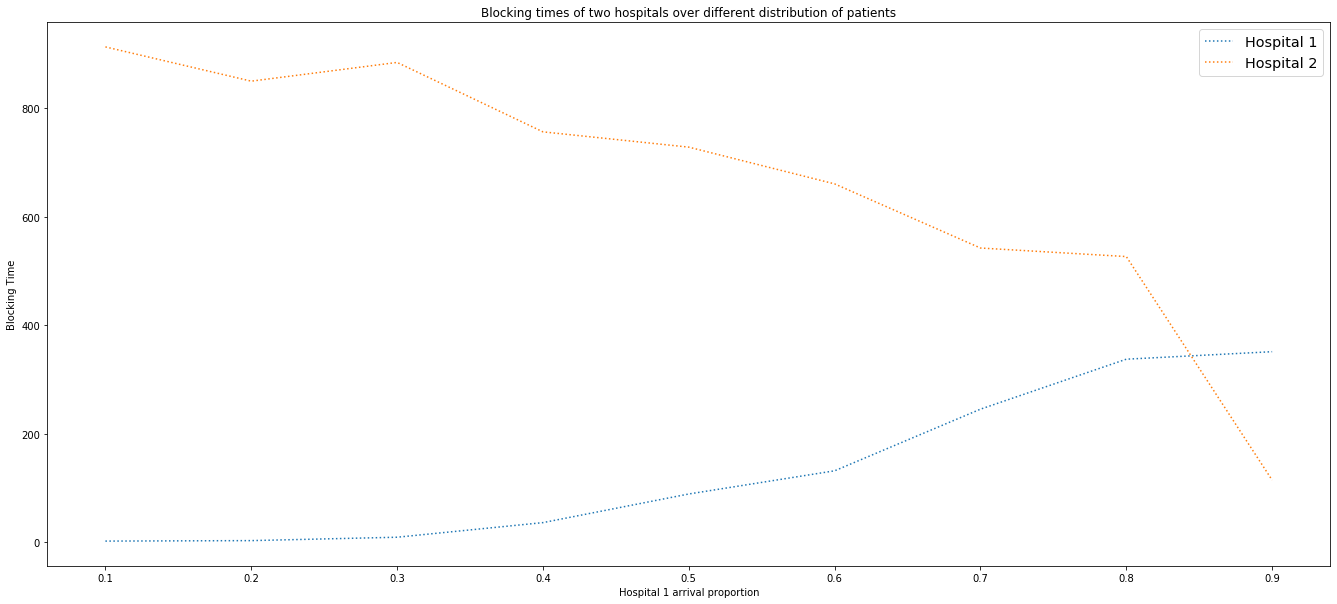

In [52]:
# 3 + 4
abg.make_plot_two_hospitals_arrival_split(lambda_a=par_3[0]+par_4[0], lambda_o_1=par_3[1], lambda_o_2=par_4[1], mu_1=par_3[2], mu_2=par_4[2], num_of_servers_1=par_3[3], num_of_servers_2=par_4[3], threshold_1=par_3[4], threshold_2=par_4[4], measurement_type="b", seed_num_1=seed_num_1, seed_num_2=seed_num_2, warm_up_time=warm_up_time, trials=num_of_trials, accuracy=accuracy, runtime=runtime)
plt.show()

# Model plot 4 - Waiting/Blocking times confidence intervals vs warm-up time

In [53]:
# Queueing Parameters
lambda_a = 0.1       # Ambulance: 6 arrivals per hour
lambda_o = 0.08      # Others: 4.8 arrivals per hour
mu = 0.03            # Service time: 1.8 services per hour
num_of_servers = 6   # Number of servers: 6 servers
threshold = 3
seed_num = None
runtime = 1440

# Plot Parameters
min_w = 0
max_w = 600
num_of_trials = 200

###### Waiting Times

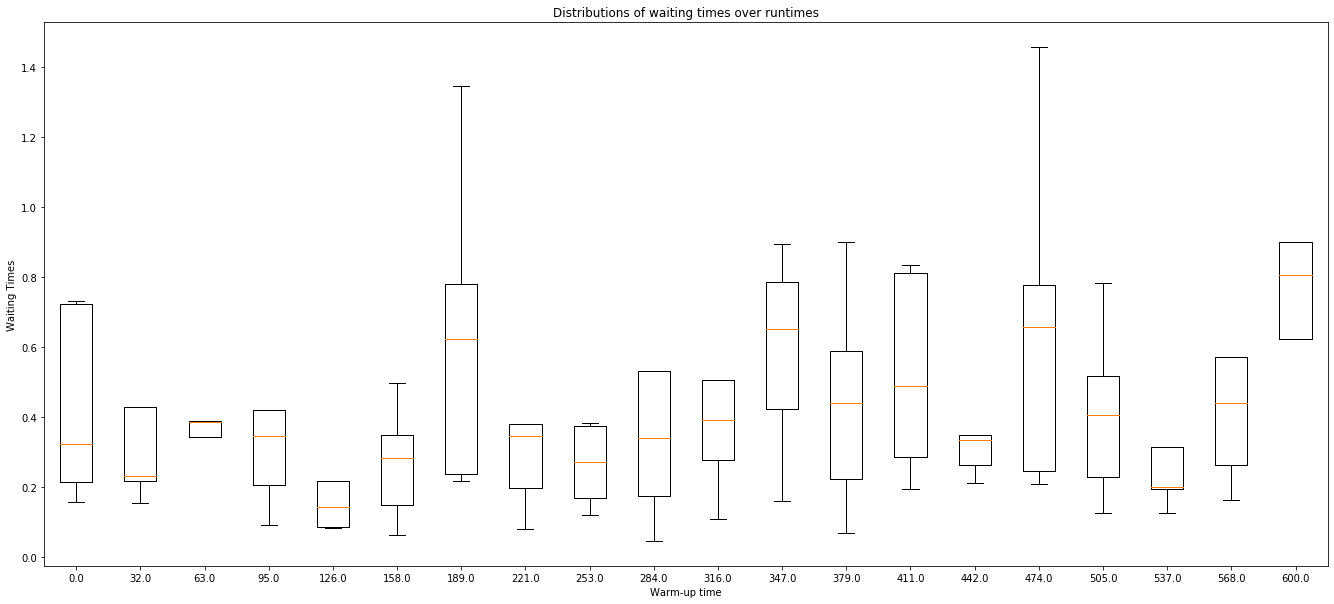

In [54]:
#1: lambda_a=0.15, lambda_o_1=0.2, mu=0.05, num_of_servers=8, threshold=5
abg.make_plot_of_confidence_intervals_over_warm_up_time(lambda_a=par_1[0], lambda_o=par_1[1], mu=par_1[2], num_of_servers=par_1[3], threshold=par_1[4], num_of_trials=num_of_trials, min_w=min_w, max_w=max_w, seed_num=seed_num, measurement_type="w", runtime=runtime)
plt.show()

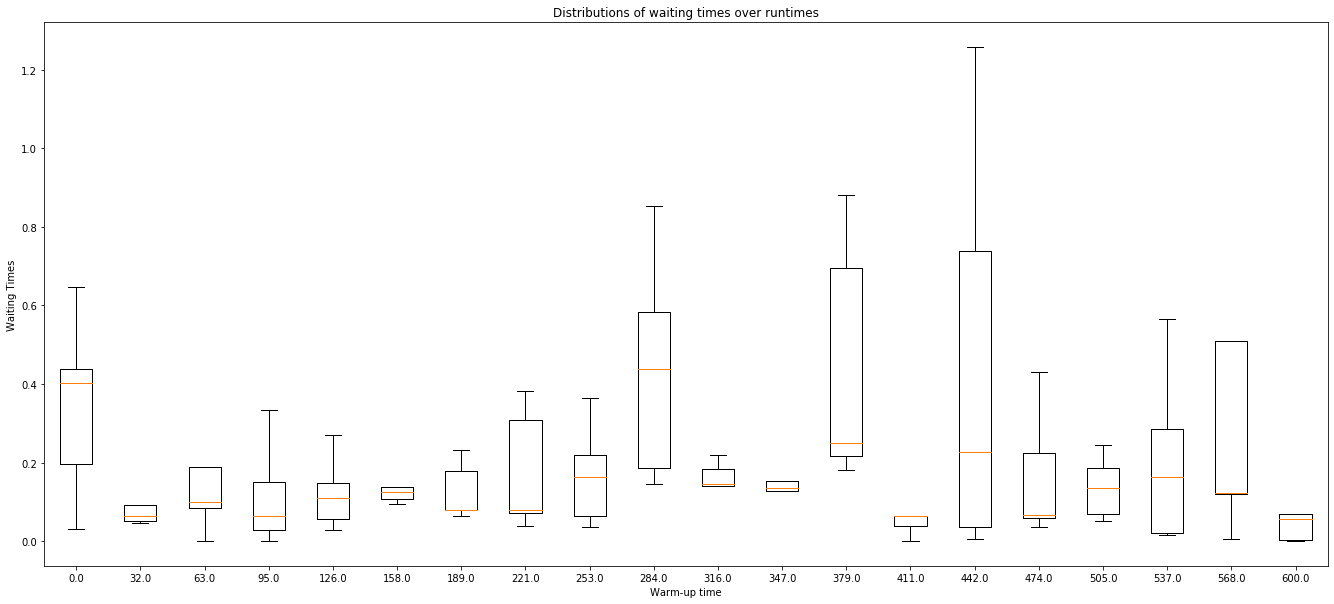

In [55]:
#2: lambda_a=0.15, lambda_o=0.1, mu=0.04, num_of_servers=7, threshold=4
abg.make_plot_of_confidence_intervals_over_warm_up_time(lambda_a=par_2[0], lambda_o=par_2[1], mu=par_2[2], num_of_servers=par_2[3], threshold=par_2[4], num_of_trials=num_of_trials, min_w=min_w, max_w=max_w, seed_num=seed_num, measurement_type="w", runtime=runtime)
plt.show()

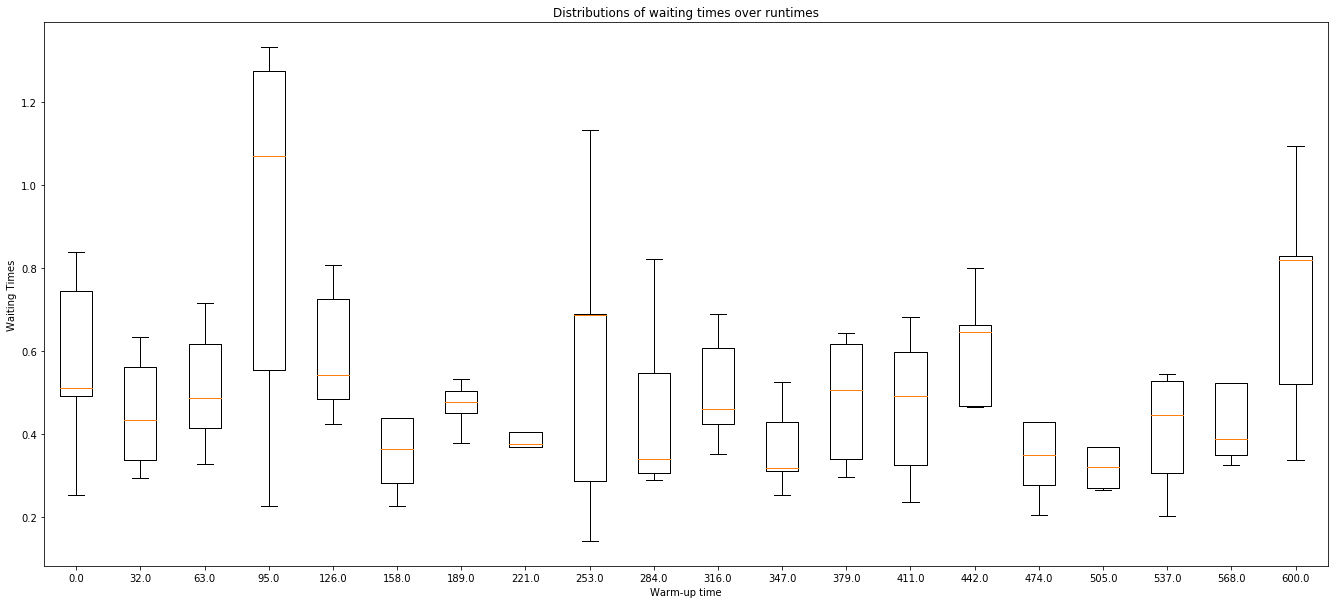

In [56]:
#3: lambda_a=0.3, lambda_o=0.3, mu=0.05, num_of_servers=12, threshold=10
abg.make_plot_of_confidence_intervals_over_warm_up_time(lambda_a=par_3[0], lambda_o=par_3[1], mu=par_3[2], num_of_servers=par_3[3], threshold=par_3[4], num_of_trials=num_of_trials, min_w=min_w, max_w=max_w, seed_num=seed_num, measurement_type="w", runtime=runtime)
plt.show()

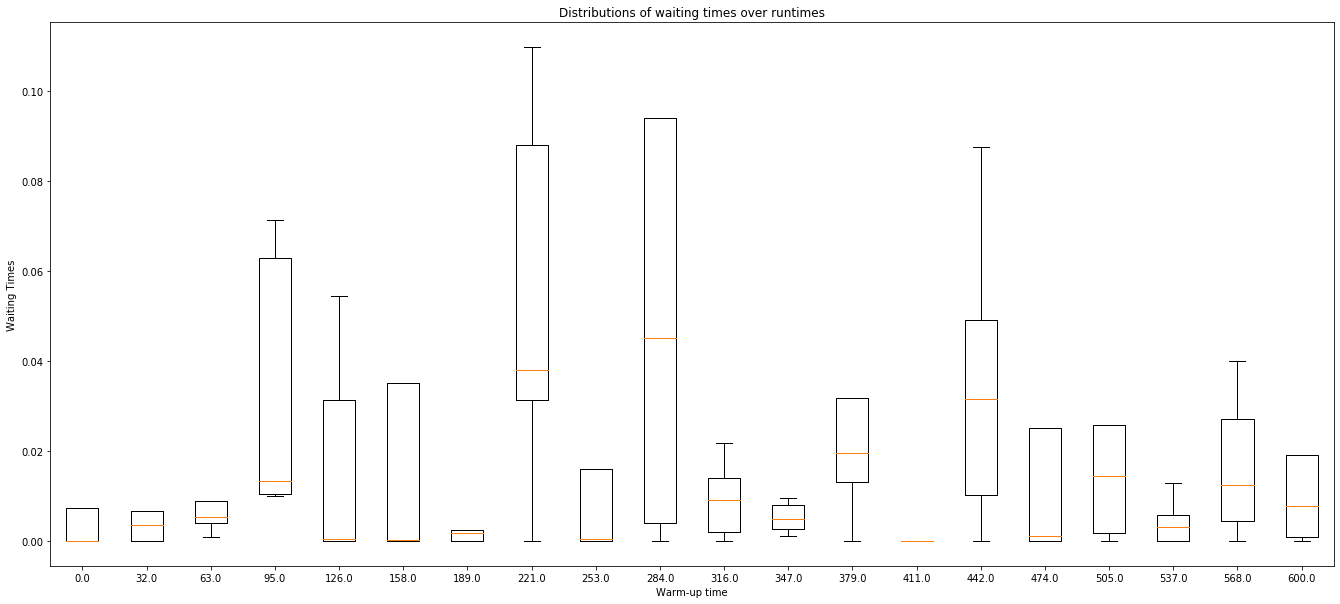

In [57]:
#4: lambda_a=0.2, lambda_o=0.3, mu=0.05, num_of_servers=13, threshold=5
abg.make_plot_of_confidence_intervals_over_warm_up_time(lambda_a=par_4[0], lambda_o=par_4[1], mu=par_4[2], num_of_servers=par_4[3], threshold=par_4[4], num_of_trials=num_of_trials, min_w=min_w, max_w=max_w, seed_num=seed_num, measurement_type="w", runtime=runtime)
plt.show()

###### Blocking Times

c:\users\micha\desktop\phd\rsch\ambulancedecisiongame\src\ambulance_game\model_plots.py:564: RuntimeWarning: Mean of empty slice
  mean_time = [np.nanmean(b.blocking_times) for b in records]
C:\Users\micha\Anaconda3\envs\AmbulanceGame\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\micha\Anaconda3\envs\AmbulanceGame\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\micha\Anaconda3\envs\AmbulanceGame\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\micha\Anaconda3\envs\AmbulanceGame\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


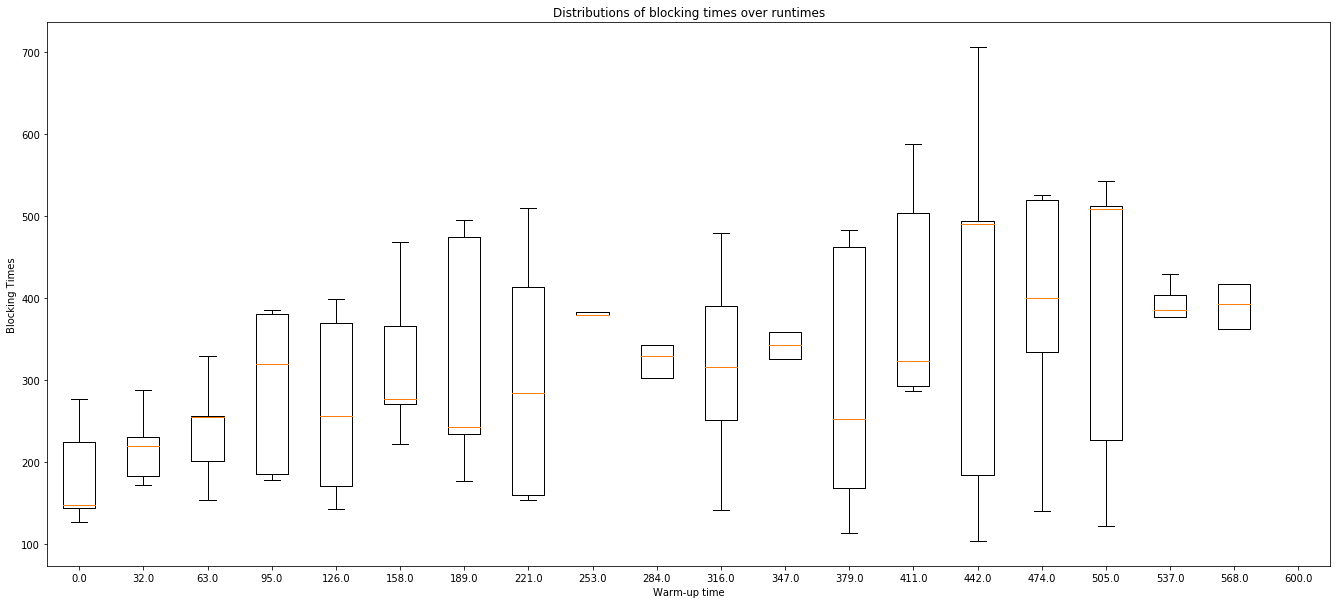

In [58]:
#1: lambda_a=0.15, lambda_o=0.2, mu=0.05, num_of_servers=8, threshold=5
abg.make_plot_of_confidence_intervals_over_warm_up_time(lambda_a=par_1[0], lambda_o=par_1[1], mu=par_1[2], num_of_servers=par_1[3], threshold=par_1[4], num_of_trials=num_of_trials, min_w=min_w, max_w=max_w, seed_num=seed_num, measurement_type="b", runtime=runtime)
plt.show()

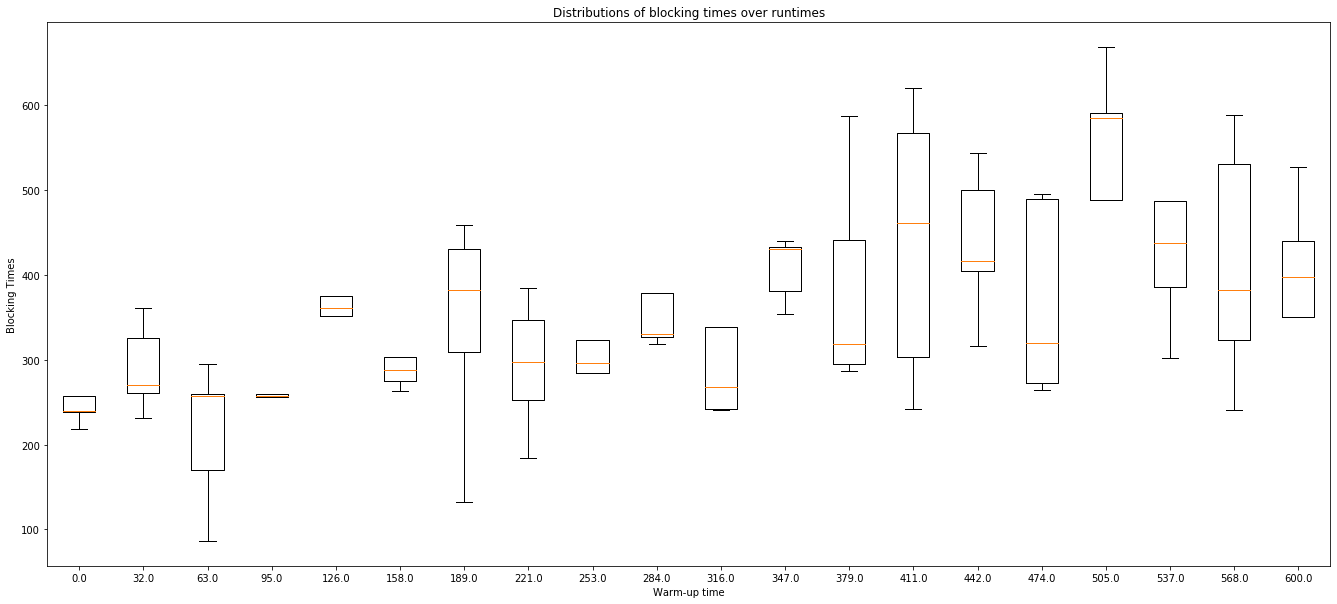

In [59]:
#2: lambda_a=0.15, lambda_o=0.1, mu=0.04, num_of_servers=7, threshold=4
abg.make_plot_of_confidence_intervals_over_warm_up_time(lambda_a=par_2[0], lambda_o=par_2[1], mu=par_2[2], num_of_servers=par_2[3], threshold=par_2[4], num_of_trials=num_of_trials, min_w=min_w, max_w=max_w, seed_num=seed_num, measurement_type="b", runtime=runtime)
plt.show()

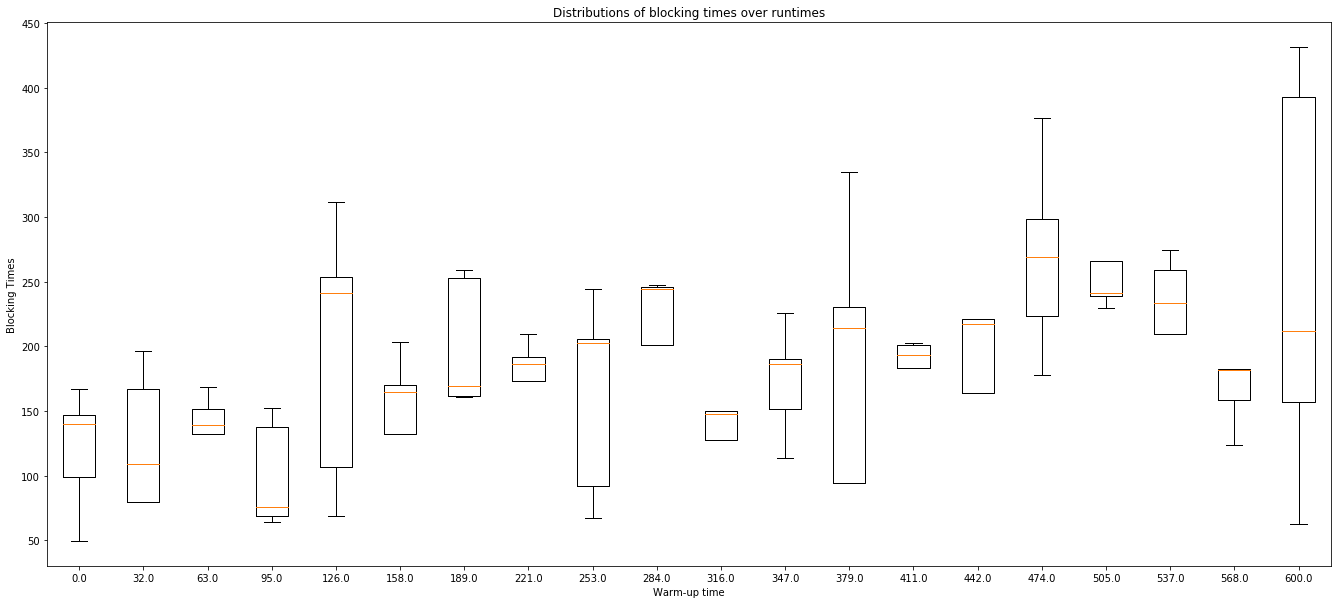

In [60]:
#3: lambda_a=0.3, lambda_o=0.3, mu=0.05, num_of_servers=12, threshold=10
abg.make_plot_of_confidence_intervals_over_warm_up_time(lambda_a=par_3[0], lambda_o=par_3[1], mu=par_3[2], num_of_servers=par_3[3], threshold=par_3[4], num_of_trials=num_of_trials, min_w=min_w, max_w=max_w, seed_num=seed_num, measurement_type="b", runtime=runtime)
plt.show()

c:\users\micha\desktop\phd\rsch\ambulancedecisiongame\src\ambulance_game\model_plots.py:564: RuntimeWarning: Mean of empty slice
  mean_time = [np.nanmean(b.blocking_times) for b in records]
C:\Users\micha\Anaconda3\envs\AmbulanceGame\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\micha\Anaconda3\envs\AmbulanceGame\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\micha\Anaconda3\envs\AmbulanceGame\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\micha\Anaconda3\envs\AmbulanceGame\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


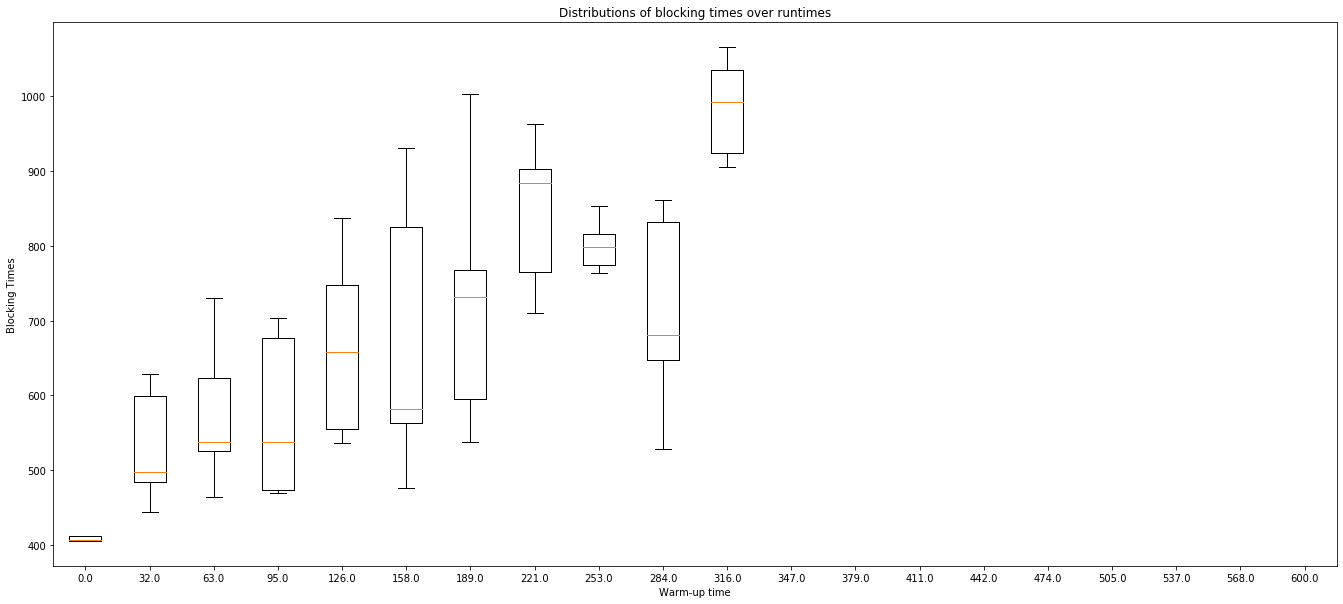

In [61]:
#4: lambda_a=0.2, lambda_o=0.3, mu=0.05, num_of_servers=13, threshold=5
abg.make_plot_of_confidence_intervals_over_warm_up_time(lambda_a=par_4[0], lambda_o=par_4[1], mu=par_4[2], num_of_servers=par_4[3], threshold=par_4[4], num_of_trials=num_of_trials, min_w=min_w, max_w=max_w, seed_num=seed_num, measurement_type="b", runtime=runtime)
plt.show()

# Model plot 5 - Waiting/Blocking times confidence intervals vs runtime

In [66]:
# Queueing Parameters
lambda_a = 0.1       # Ambulance: 6 arrivals per hour
lambda_o = 0.08      # Others: 4.8 arrivals per hour
mu = 0.03            # Service time: 1.8 services per hour
num_of_servers = 6   # Number of servers: 6 servers
threshold = 4
seed_num = None
warm_up_time = 200

# Plot Parameters
min_r = 700
max_r = 28000
num_of_trials = 20

###### Waiting Times

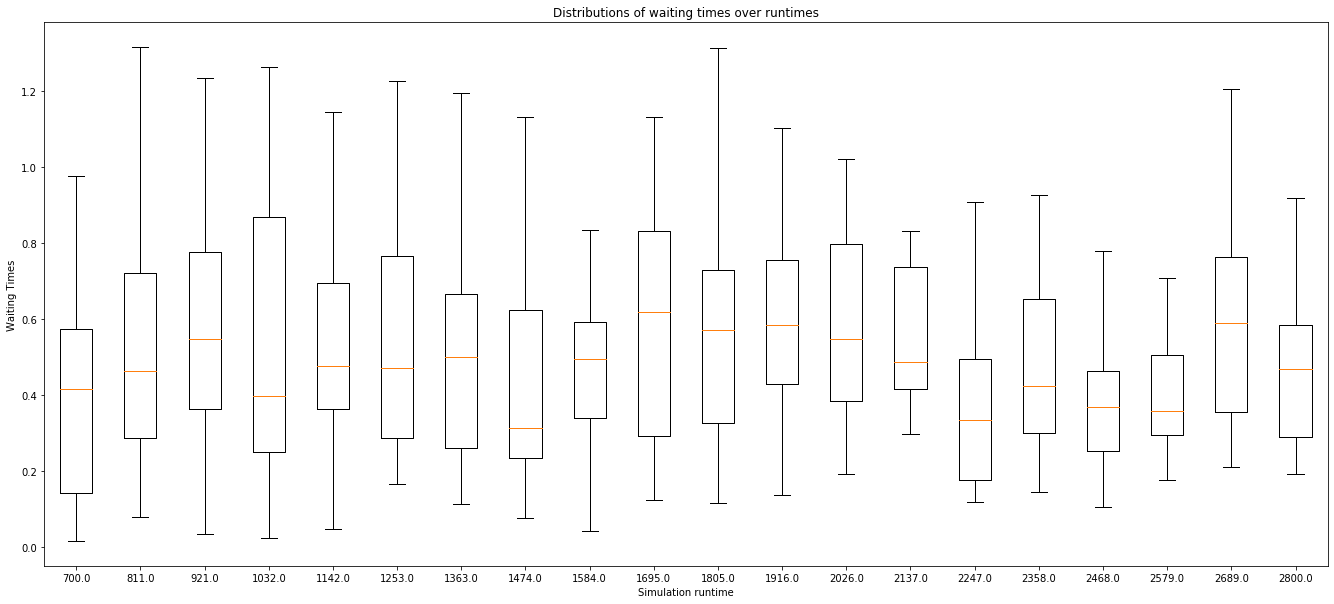

In [67]:
#1: lambda_a=0.15, lambda_o=0.2, mu=0.05, num_of_servers=8, threshold=5
abg.make_plot_of_confidence_intervals_over_runtime(lambda_a=par_1[0], lambda_o=par_1[1], mu=par_1[2], num_of_servers=par_1[3], threshold=par_1[4], warm_up_time=warm_up_time, num_of_trials=num_of_trials, min_r=min_r, max_r=max_r, seed_num=seed_num, measurement_type="w")
plt.show()

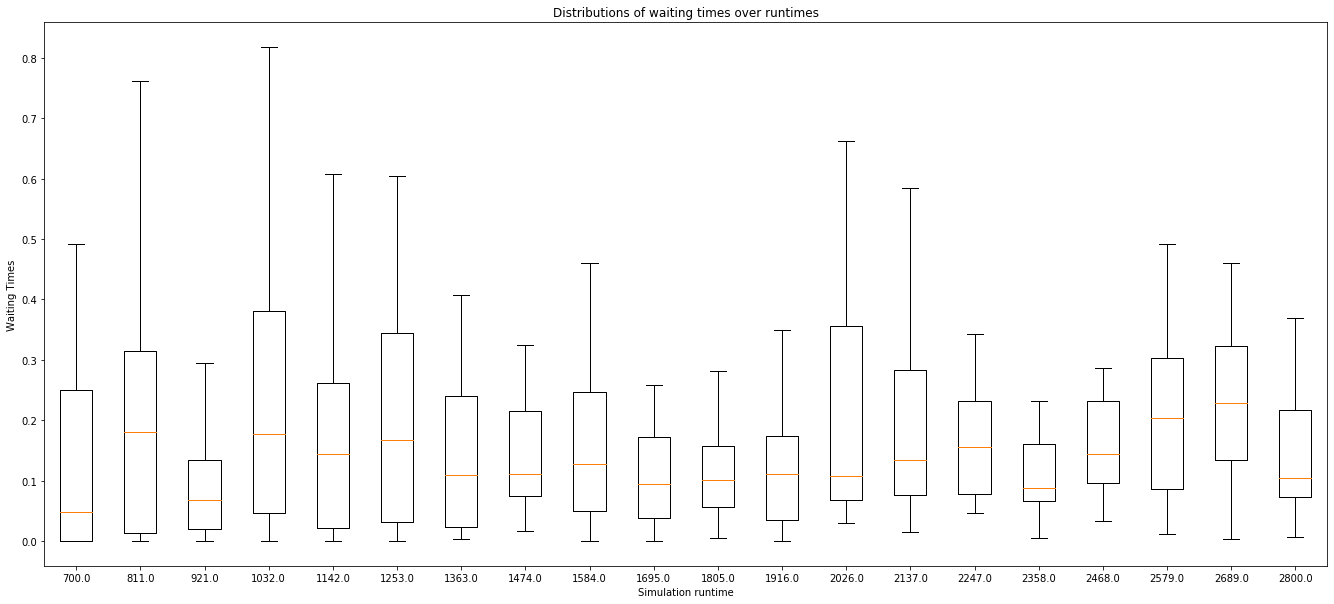

In [68]:
#2: lambda_a=0.15, lambda_o=0.1, mu=0.04, num_of_servers=7, threshold=4
abg.make_plot_of_confidence_intervals_over_runtime(lambda_a=par_2[0], lambda_o=par_2[1], mu=par_2[2], num_of_servers=par_2[3], threshold=par_2[4], warm_up_time=warm_up_time, num_of_trials=num_of_trials, min_r=min_r, max_r=max_r, seed_num=seed_num, measurement_type="w")
plt.show()

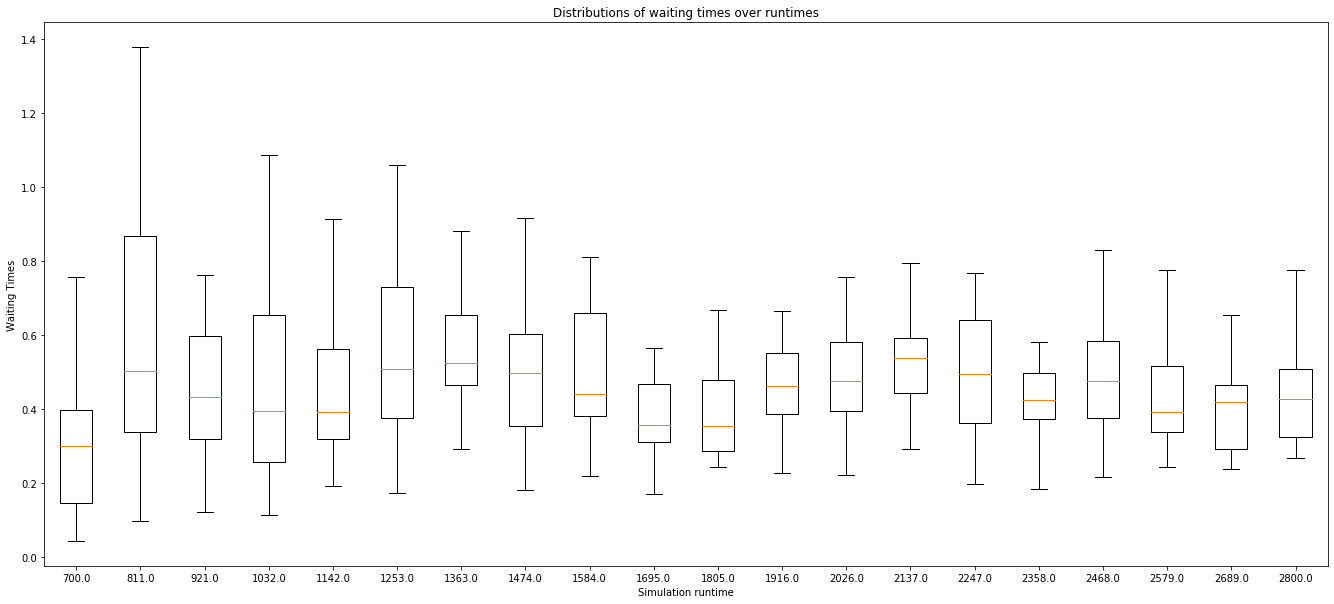

In [69]:
#3: lambda_a=0.3, lambda_o=0.3, mu=0.05, num_of_servers=12, threshold=10
abg.make_plot_of_confidence_intervals_over_runtime(lambda_a=par_3[0], lambda_o=par_3[1], mu=par_3[2], num_of_servers=par_3[3], threshold=par_3[4], warm_up_time=warm_up_time, num_of_trials=num_of_trials, min_r=min_r, max_r=max_r, seed_num=seed_num, measurement_type="w")
plt.show()

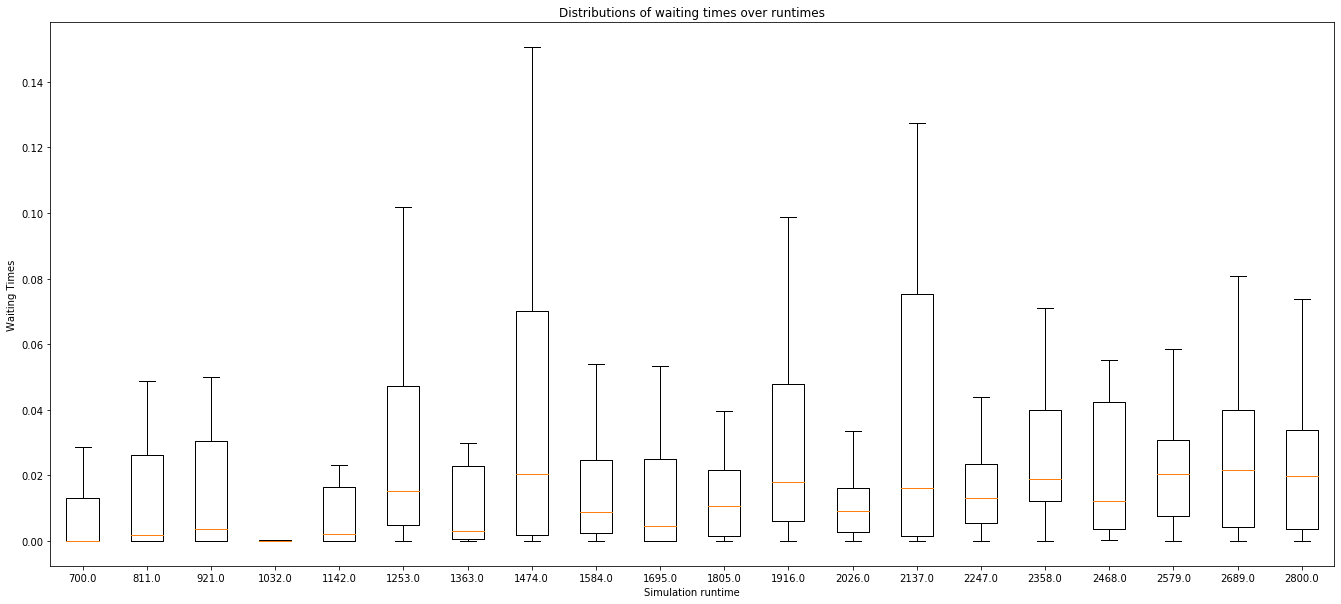

In [70]:
#4: lambda_a=0.2, lambda_o=0.3, mu=0.05, num_of_servers=13, threshold=5
abg.make_plot_of_confidence_intervals_over_runtime(lambda_a=par_4[0], lambda_o=par_4[1], mu=par_4[2], num_of_servers=par_4[3], threshold=par_4[4], warm_up_time=warm_up_time, num_of_trials=num_of_trials, min_r=min_r, max_r=max_r, seed_num=seed_num, measurement_type="w")
plt.show()

###### Blocking Times

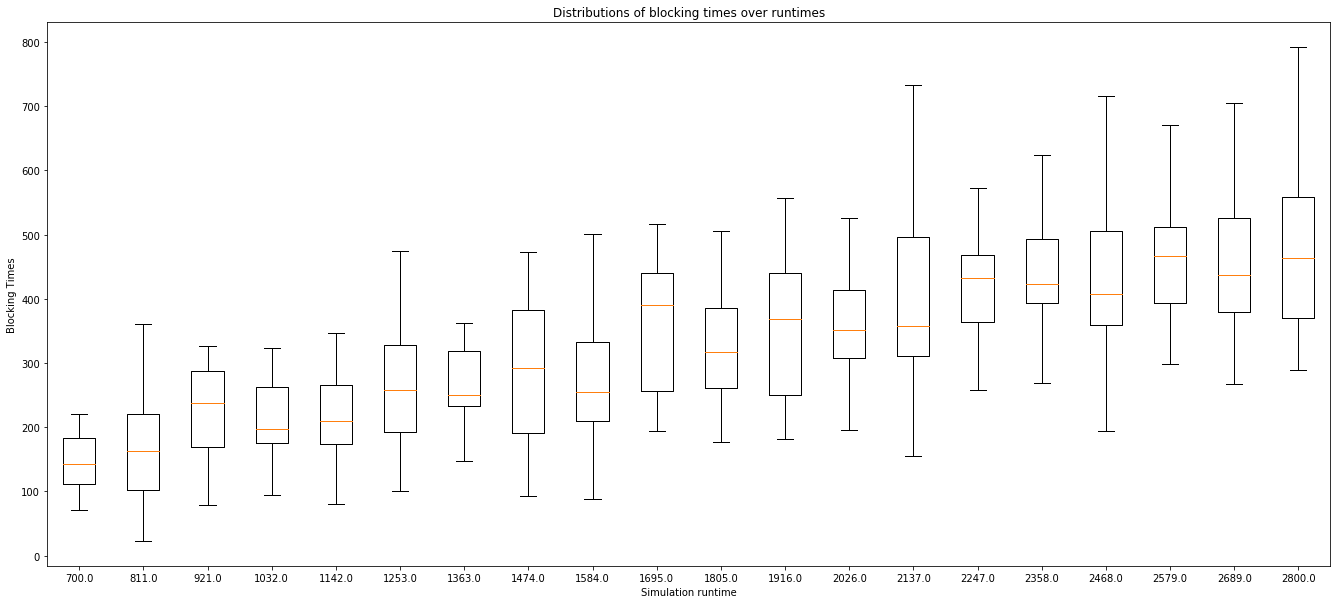

In [71]:
#1: lambda_a=0.15, lambda_o=0.2, mu=0.05, num_of_servers=8, threshold=5
abg.make_plot_of_confidence_intervals_over_runtime(lambda_a=par_1[0], lambda_o=par_1[1], mu=par_1[2], num_of_servers=par_1[3], threshold=par_1[4], warm_up_time=warm_up_time, num_of_trials=num_of_trials, min_r=min_r, max_r=max_r, seed_num=seed_num, measurement_type="b")
plt.show()

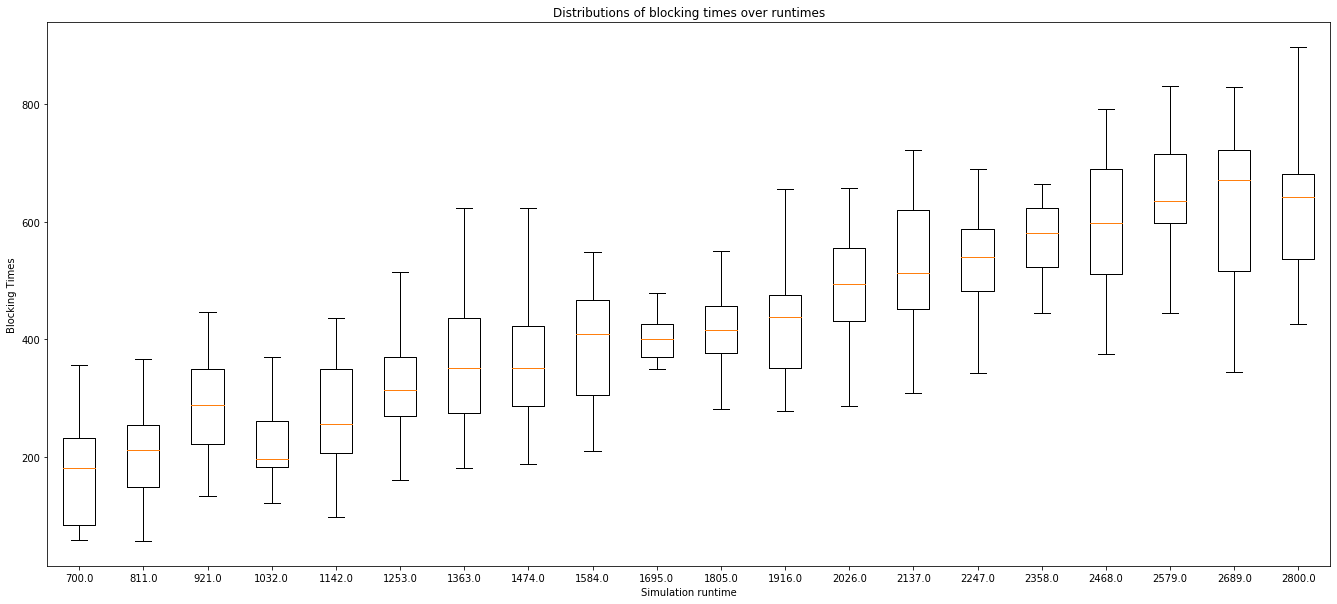

In [72]:
#2: lambda_a=0.15, lambda_o=0.1, mu=0.04, num_of_servers=7, threshold=4
abg.make_plot_of_confidence_intervals_over_runtime(lambda_a=par_2[0], lambda_o=par_2[1], mu=par_2[2], num_of_servers=par_2[3], threshold=par_2[4], warm_up_time=warm_up_time, num_of_trials=num_of_trials, min_r=min_r, max_r=max_r, seed_num=seed_num, measurement_type="b")
plt.show()

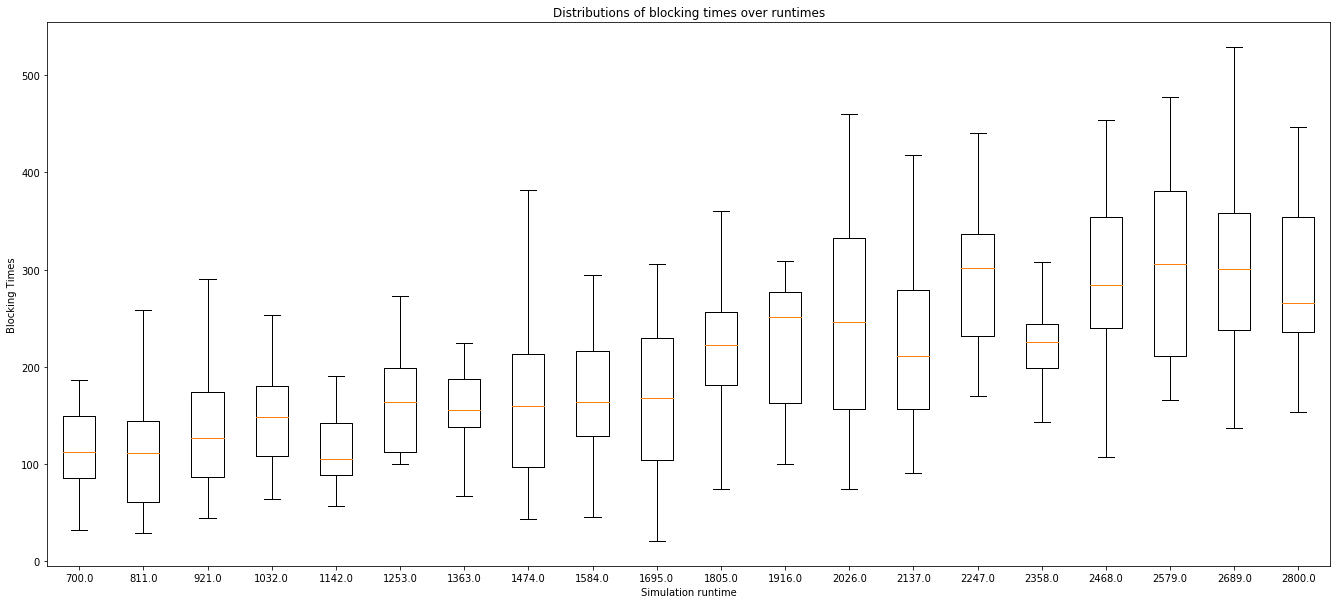

In [73]:
#3: lambda_a=0.3, lambda_o=0.3, mu=0.05, num_of_servers=12, threshold=10
abg.make_plot_of_confidence_intervals_over_runtime(lambda_a=par_3[0], lambda_o=par_3[1], mu=par_3[2], num_of_servers=par_3[3], threshold=par_3[4], warm_up_time=warm_up_time, num_of_trials=num_of_trials, min_r=min_r, max_r=max_r, seed_num=seed_num, measurement_type="b")
plt.show()

c:\users\micha\desktop\phd\rsch\ambulancedecisiongame\src\ambulance_game\model_plots.py:564: RuntimeWarning: Mean of empty slice
  mean_time = [np.nanmean(b.blocking_times) for b in records]
C:\Users\micha\Anaconda3\envs\AmbulanceGame\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\micha\Anaconda3\envs\AmbulanceGame\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\micha\Anaconda3\envs\AmbulanceGame\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\micha\Anaconda3\envs\AmbulanceGame\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


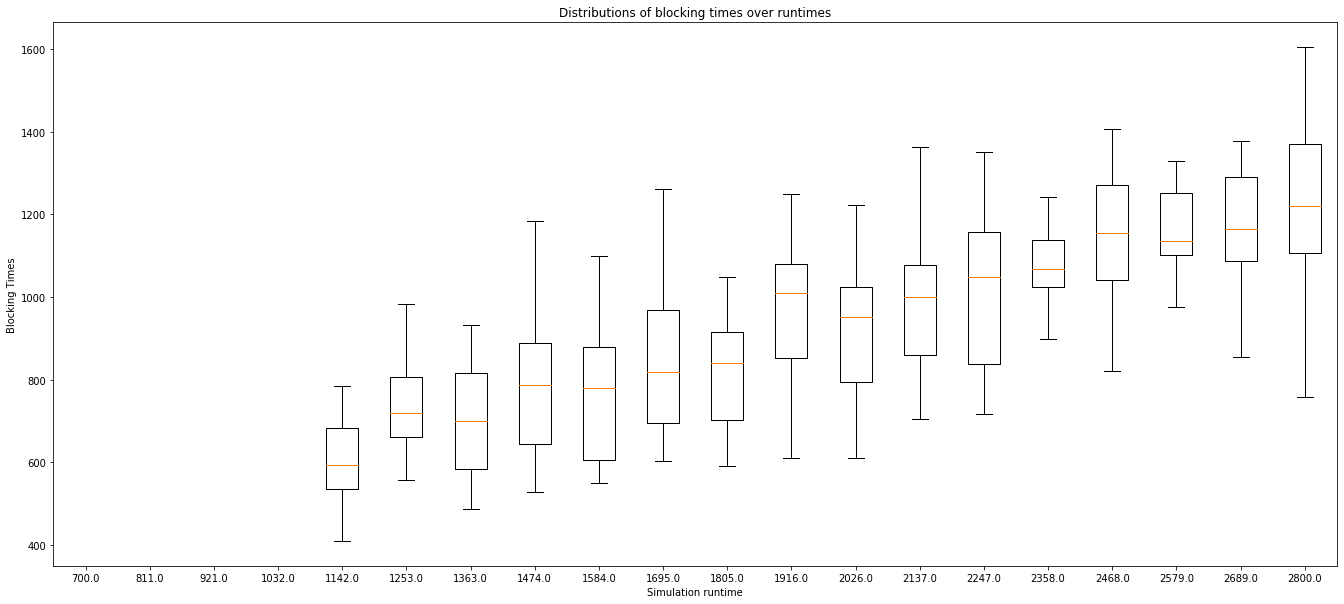

In [74]:
#4: lambda_a=0.2, lambda_o=0.3, mu=0.05, num_of_servers=13, threshold=5
abg.make_plot_of_confidence_intervals_over_runtime(lambda_a=par_4[0], lambda_o=par_4[1], mu=par_4[2], num_of_servers=par_4[3], threshold=par_4[4], warm_up_time=warm_up_time, num_of_trials=num_of_trials, min_r=min_r, max_r=max_r, seed_num=seed_num, measurement_type="b")
plt.show()

# Optimal arrival split based on blocking time

In [69]:
# System Parameters
lambda_a = 0.15
num_of_trials = 10
runtime = 1440
warm_up_time = 100

# Hospital 1 Parameters
lambda_o_1 = 0.08      # Others: 4.8 arrivals per hour
mu_1 = 0.05           # Service time: 1.8 services per hour
num_of_servers_1 = 6   # Number of servers: 6 servers
threshold_1 = 6
seed_num_1 = 8

# Hospital 2 Parameters
lambda_o_2 = 0.08
mu_2 = 0.05
num_of_servers_2 = 6
threshold_2 = 6
seed_num_2 = 120

In [70]:
p_1 = abg.simulation.calculate_optimal_ambulance_distribution(lambda_a=lambda_a, lambda_o_1=lambda_o_1, lambda_o_2=lambda_o_2, mu_1=mu_1, mu_2=mu_2, num_of_servers_1=num_of_servers_1, num_of_servers_2=num_of_servers_2, threshold_1=threshold_1, threshold_2=threshold_2, seed_num_1=seed_num_1, seed_num_2=seed_num_2, num_of_trials=num_of_trials, warm_up_time=warm_up_time, runtime=runtime)
p_2 = 1 - p_1

In [71]:
results_1 = abg.simulation.get_multiple_runs_results(lambda_a=p_1 * lambda_a, lambda_o=lambda_o_1, mu=mu_1, num_of_servers=num_of_servers_1, threshold=threshold_1, seed_num=seed_num_1, warm_up_time=warm_up_time, num_of_trials=num_of_trials, output_type="tuple", runtime=runtime)
results_2 = abg.simulation.get_multiple_runs_results(lambda_a=p_2 * lambda_a, lambda_o=lambda_o_2, mu=mu_2, num_of_servers=num_of_servers_2, threshold=threshold_2, seed_num=seed_num_2, warm_up_time=warm_up_time, num_of_trials=num_of_trials, output_type="tuple", runtime=runtime)
mean_blocking_1 = np.mean([np.nanmean(b.blocking_times) if len(b.blocking_times) != 0 else 0 for b in results_1])
mean_blocking_2 = np.mean([np.nanmean(b.blocking_times) if len(b.blocking_times) != 0 else 0 for b in results_2])

In [72]:
print("Mean Blocking times")
print(mean_blocking_1, mean_blocking_2)

Mean Blocking times
0.7957973685686823 0.7204335935092655


In [73]:
print("Proportions")
print(p_1, p_2)

Proportions
0.5277516797192391 0.4722483202807609


In [74]:
print("Ambulance patients per hour")
print(p_1 * lambda_a * 60, p_2 * lambda_a * 60)

Ambulance patients per hour
4.749765117473151 4.250234882526848


# Examples for testing

In [113]:
# lambda_a=0.15, lambda_o=0.2, mu=0.05, num_of_servers=8, threshold=5
# lambda_a=0.15, lambda_o=0.1, mu=0.04, num_of_servers=7, threshold=4
# lambda_a=0.3, lambda_o=0.3, mu=0.05, num_of_servers=12, threshold=10
# lambda_a=0.2, lambda_o=0.3, mu=0.05, num_of_servers=13, threshold=5

In [115]:
ciw.seed(5)
Q = ciw.Simulation(build_model(1, 1, 2, 1))

Q.simulate_until_max_time(100)
records = Q.get_all_records()
waits = [r.waiting_time for r in records]
blocks = [r.time_blocked for r in records]

print(len(records))
print(sum(waits))
print(sum(blocks))

In [171]:
ciw.seed(5)
Q = ciw.Simulation(build_model(1, 1, 2, 1), node_class=build_custom_node(7))

Q.simulate_until_max_time(100)
records = Q.get_all_records()
waits = [r.waiting_time for r in records]
blocks = [r.time_blocked for r in records]

print(len(records))
print(sum(waits))
print(sum(blocks))

290
1040.318433783405
52.00679633745028


In [172]:
sim_results = []
for i in range(10):
    simulation = simulate_model(0.15, 0.2, 0.05, 8, 4, i)
    sim_results.append(len(simulation.get_all_records()))

In [173]:
sim_results

[699, 719, 759, 715, 703, 719, 695, 685, 775, 719]

# To Confirm

In [23]:
# Simulation Parameters
lambda_a = 0.15       # Ambulance: 6 arrivals per hour
lambda_o = 0.2       # Others: 3 arrivals per hour
mu = 0.05            # Service time: 3 services per hour
num_of_servers = 8   # Number of servers: 8 servers
threshold = 4        # Threshold of accepting ambulance patients
seed_num = None      # ciw.seed value

In [24]:
dummy_model = abg.simulation.simulate_model(lambda_a, lambda_o, mu, num_of_servers, threshold, seed_num).get_all_records()

In [25]:
dummy_waits_node_1 = [i.waiting_time for i in dummy_model if i.node == 1]
dummy_blocs_node_2 = [i.time_blocked for i in dummy_model if i.node == 2]

In [26]:
print(all(dummy_waits_node_1) == 0)
print(all(dummy_blocs_node_2) == 0)

True
True


###### For any parmeters all waiting times from node 1 will be 0 and all blocking times from node 2 will be 0

In [57]:
dummy_waits_node_1

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [70]:
dummy_blocs_node_2

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

# Dummy Cells